# Library

In [2]:
# Ignore the warnings
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Python path
import sys
base_folder = 'DataScience'
location_base = os.path.join(os.getcwd().split(base_folder)[0], base_folder)
location_module = [os.path.join(location_base, 'Module')] 
for each in location_module:
    if each not in sys.path:
        sys.path.append(each)

# Auto reload of library
%reload_ext autoreload
%autoreload 2

from import_KK import *
DeviceStrategy_GPU()
from preprocessing_KK import *
from preprocessing_project_KK import *
from description_KK import *
from algorithm_machinelearning_KK import *
from algorithm_deeplearning_KK import *
from evaluation_KK import *
from visualization_KK import *


=========== GPU Strategy ===========
Detected GPUs:
 [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
TF using MirroredStrategy with 2 GPUs:
 ['/GPU:0', '/GPU:1']


======= GPU / CUDA / STATUS ========
Cuda Ready?        True
CUDA Version:      12.5.1
cuDNN Version:     9

TF Version:        2.19.0
Keras Version:     3.10.0
True
Torch Version:       2.7.1+cu126
Torch CUDA Version:  12.6
Torch cuDNN Version: 90501

Torch GPUs Available: 2
Use the GPU: NVIDIA GeForce RTX 3090



# Hyperparameters

In [42]:
# Data
FOLDER_LOCATION = os.path.join('.', 'Data')
DF_YEAR = [2022, 2021, 2020, 2019, 2018]
Y_colname = {
    '비형식교육 참여자': {1:1, 2:0}
}
X_custom = {
    '문C1) 앞으로 참여하길 희망하는 프로그램은 무엇입니까? (중복응답)1': {99:0}, 
    '학력별': {4:0}, 
    '문H1) 귀하께서는 전반적으로 현재의 생활에 얼마나 만족하십니까?': {99:1}, 
    '직장의 규모': {9:0},
    '근무기간': {9:0}
}
X_dummy = [
    'DQ1. 귀하의 최종 학력은 어떻게 되십니까?__상태구분',
    'DQ6. 귀하께서는 건강에 자신 있습니까?',
    'DQ7. 귀하의 주된 소득원천은 무엇입니까?',
    'DQ9. 귀하의 현재 고용형태는 어떻게 되십니까?',
    'DQ10. 귀하는 현재 어떤 직업에 종사하고 계십니까?',
    '직업'
]           
X_reverse = [
    '문A1-1) 작년(21.01.01~21.12.31) (1) 학위(졸업장) 취득을 위한 교육 참여 경험 여부',
    '문B1-5) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__학습을 목적으로 텔레비전^ 라디오 등을 활용해서 새로운 지식을 습득한 적이 있다',
    '문B1-7) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__역사적·자연적·산업적 장소를 방문해서 지식을 습득한 적이 있다',
    '문B1-1) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__가족^ 친구 또는 직장동료^ 상사의 도움이나 조언을 통해 지식을 습득한 적이 있다',
    '문B1-2) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__트위터^ 페이스북^ 카페^ 블로그^ 밴드 등을 활용해서 새로운 정보나 기술을 습득한 적이 있다',
    '문B1-3) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__유튜브(Youtube) 등을 활용해서 새로운 정보나 기술을 습득한 적이 있다',
    '문B1-4) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__인터넷 뉴스^ E-book 등 온라인매체를 활용해서 새로운 정보나 기술을 습득한 적이 있다',
    '문B1-6) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__책이나 전문잡지 등 인쇄매체를 활용해서 지식을 습득한 적이 있다',
    '문B1-8) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__도서관 등을 방문해서 새로운 사실을 배운 적이 있다',
    '문B1-9) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__축제^ 박람회^ 음악회 등에 참여해서 무언가를 새롭게 배우거나 깊이 있게 알게된 적이 있다',
    '문B1-10) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__스포츠^ 등산 등 신체를 움직이는 활동에 참여해서 무언가를 새롭게 배우거나 깊이 있게 알게 된 적이 있다',
    '문C2) 귀하께서는 작년(교육이나 학습 프로그램의 참여여부와 관계없이)에 참여하고 싶었지만 참여하지 못했던 평생교육 프로그램이 있었습니까?',
    '문D1) 귀하께서는 작년에 평생교육 프로그램 관련 정보를 접한 적이 있습니까?',
    'DQ8. 귀하께서는 현재 수입을 목적으로 일하고 계십니까?',
    '경활상태',
    '지역규모별',
    '건강에 대한 자신감',
    '취약계층',
    '취업구분',
    '고용형태',
    '평생학습 참여자',
    '형식교육 참여자',
    '비형식교육 참여자',
    '직업관련 비형식교육 참여자',
    '동시 참여자'
]
X_delete = [
    'ID', '원가중치', '평생학습 참여자', '직업관련 비형식교육 참여자', '동시 참여자',
    # DQ컬럼과 중복(by 조은지)
    '학력별', '자녀유무 및 막내자녀 상태', '동거가족 유무', '부양가족 유무', '취학 전의 손자/손녀 유무', 
    '건강에 대한 자신감', '고용형태', '직업', '직장의 규모', '근무기간',
    '문A1-1) 작년(21.01.01~21.12.31) (1) 학위(졸업장) 취득을 위한 교육 참여 경험 여부'
]
TEST_SIZE = 0.2
RANDOM_STATE = 123
CLASS_STAT = True
## 'RandomUnderSampler', 'TomekLinks', 'CondensedNearestNeighbour', 'OneSidedSelection'
## 'SMOTE', 'SMOTETomek', 'BorderlineSMOTE', 'ADASYN', 'auto'
SAMPLING_METHOD = 'auto'
## 'minority', 'not majority', 'not minority', 'all', 'auto'
SAMPLING_STRATEGY = 'auto'    # 'minority', 'not majority', 'not minority', 'all', 'auto'
SCALER = 'minmax'
LABEL_LIST = ['Formal Education', 'Non-formal Ecudation']

# Model
TUNE_TRIALS = 10
CV_SPLITS = 5
METRIC = 'val_Accuracy'
TUNE_METRIC = 'auto'
TUNE_METRIC_DL = 'val_Accuracy' # 'AUC', 'Accuracy', 'F1-score', 'loss', 'val_AUC', 'val_Accuracy', 'val_F1-score', 'val_loss'
################
tf.random.set_seed(123)
NODE_MLP = [128, 256, 128, 64, 32, 10]
NODE_CNN1 = [128, 256, 128]
NODE_CNN2 = [64, 32, 10]
WEIGHT_METHOD = None   # None, 'class', 'sample'
VALIDATION_SPLIT = None
BATCH_SIZE = 64
EPOCHS = 2000
VERBOSE = 0
################
SHAP = True
INTERACTION = True
INTERACTION_SAMPLES = 3000
# FEATURE_PERTURBATION = 'tree_path_dependent'    # 'tree_path_dependent', 'interventional'
X_TOP_DISPLAY = 50
################
METRIC_FINAL = "F1-score"

# Save



# Data Merge

In [4]:
# Data Loading
df_dict = dict()
df_columns = pd.read_excel(os.path.join(FOLDER_LOCATION, '평생교육실태조사_코드명통합_수정본.xlsx')).iloc[:,2:]
for year in DF_YEAR:
    folder_location=os.path.join(FOLDER_LOCATION, '{}_총괄_20250320_36011.csv'.format(year))
    df_dict[year] = pd.read_csv(folder_location, encoding='cp949')
    print(year, df_dict[year].shape)
    ## 변수명 DF_YEAR[0]기준으로 동일하게 변경
    if year != DF_YEAR[0]:
        df_sub = pd.concat([df_columns[[col for col in df_columns.columns if col.split('_')[1] == str(year)]], df_columns.iloc[:,[0]]], axis=1)
        df_rename = dict(df_sub[df_sub.iloc[:,1] != 0].dropna().reset_index().iloc[:,1:].values)
        df_dict[year] = df_dict[year].rename(columns=df_rename)
      
# Feature Comparison
colname_compare, colname_common = table_compare_dfscolname(df_dict[DF_YEAR[0]], [df_dict[i] for i in DF_YEAR[1:]],
                                                           colname_list=DF_YEAR)

## Final Feature
for year in DF_YEAR:
    ## 사용할 변수명 추출
    colnames = list(colname_common[[i for i in colname_common.columns if i.split('_')[1] == str(year)]].values.flatten())
    
    ## 최종선택과 추가해야할 변수 구분
    colname_select, colname_add = [], []
    for idx, colname in enumerate(colnames):
        if colname != 0:
            colname_select.append(colname)
        else:
            colname_add.append([i for i in colname_common.iloc[idx,:].unique() if i != 0][0])
            
    ## 변수 업데이트
    df_dict[year] = df_dict[year][colname_select]
    for add in colname_add:
        df_dict[year][add] = np.nan

## df 생성
df = dict_to_concatdf(df_dict)

2022 (9968, 437)
2021 (9905, 454)
2020 (9776, 434)
2019 (9973, 511)
2018 (11747, 600)


0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Final Shape of df:  (51369, 368)


# Preprocessing


Preprocessing for Data Prepare...
Initial Shape:  (51369, 368)

Deleting Non-meaning Variables...
Shape:  (51369, 342)

Preprocessing NAN...
Column Deleting...
These  85.08771929824562 %( 291 ) columns are containing more than  50.0 % null values!: ['문A2-1) 프로그램 유형__(1)학위취득을 위한 교육_1', '문A2-6) 연간참여시간__(1)학위취득을 위한 교육_1', '문A2-7) 자기부담학습비__(1)학위취득을 위한 교육_1', '문A1-2) 참여한 프로그램 수는 몇개입니까? (2) 성인기초 및 문자해득교육(문해교육)', '문A1-2) 참여한 프로그램 수는 몇개입니까? (3) 직업능력향상교육', '문A1-2) 참여한 프로그램 수는 몇개입니까? (5) 문화예술스포츠교육', '문A1-2) 참여한 프로그램 수는 몇개입니까? (6) 시민참여교육', '문A1-2) 참여한 프로그램 수는 몇개입니까? (4) 인문교양교육', '문A2-5) 참여목적__(1)학위취득을 위한 교육_1', '문A2-1) 프로그램 유형__(2)성인기초 및 문자해득교육_1', '문A2-2) 프로그램 형태__(2)성인기초 및 문자해득교육_1', '문A2-3) 기관 유형__(2)성인기초 및 문자해득교육_1', '문A2-5) 참여목적__(2)성인기초 및 문자해득교육_1', '문A2-6) 연간참여시간__(2)성인기초 및 문자해득교육_1', '문A2-7) 자기부담학습비__(2)성인기초 및 문자해득교육_1', '문A2-8) 학습비 외부 지원여부__(2)성인기초 및 문자해득교육_1', '문A2-9) 학습비 외부 지원기관__(2)성인기초 및 문자해득교육_1', '문A2-10) 프로그램만족도__(2)성인기초 및 문자해득교육_1', '문A2-11) 프로그램 불만족 요인(중복응답)__(2)성인기초 및 문자해득교육_1

  0%|          | 0/10 [00:00<?, ?it/s]


Shape of Data:  (51369, 51)
Complete of fillna!
Shape:  (51369, 51)
Dummy Feature Generating...


  0%|          | 0/6 [00:00<?, ?it/s]

Shape:  (51369, 78)

Object X Features:  []
Complete X Object Processing!
(41095, 77) (41095, 1)
(10274, 77) (10274, 1)
Data Split!


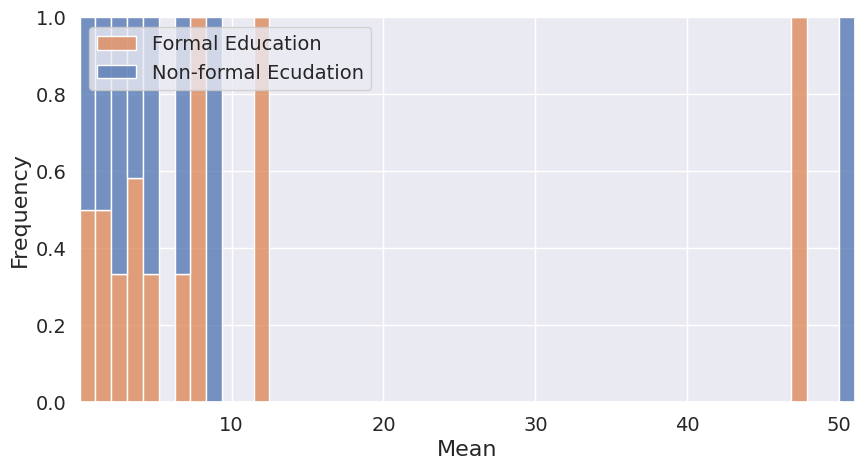

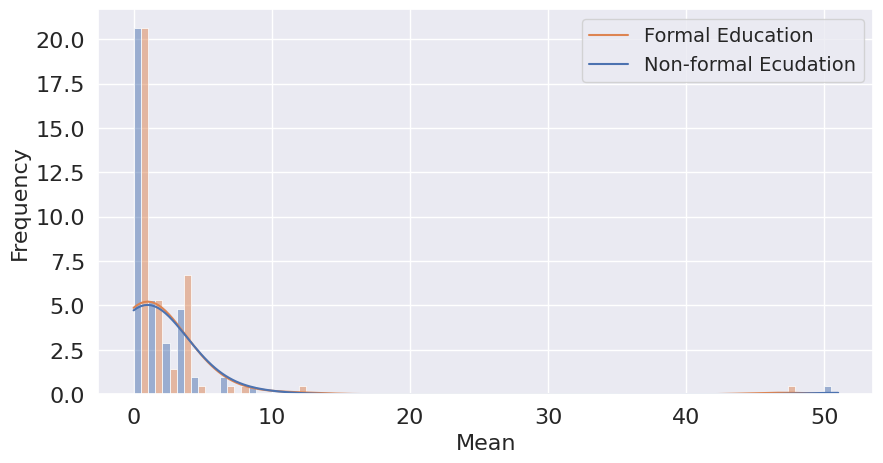

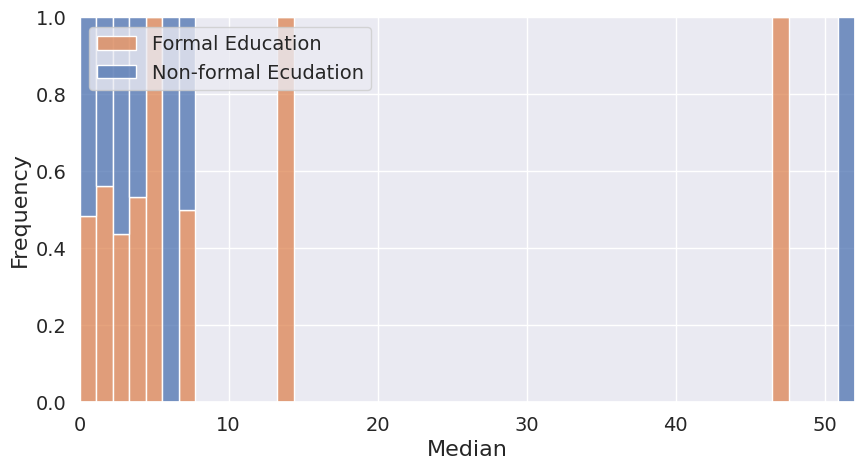

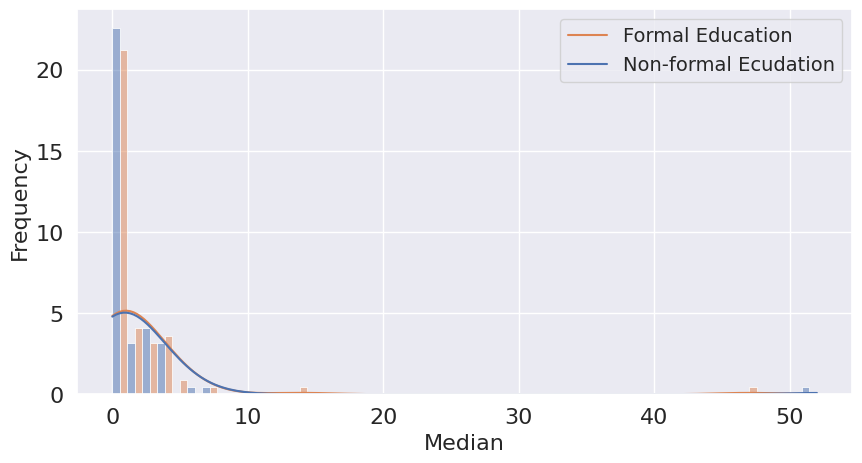

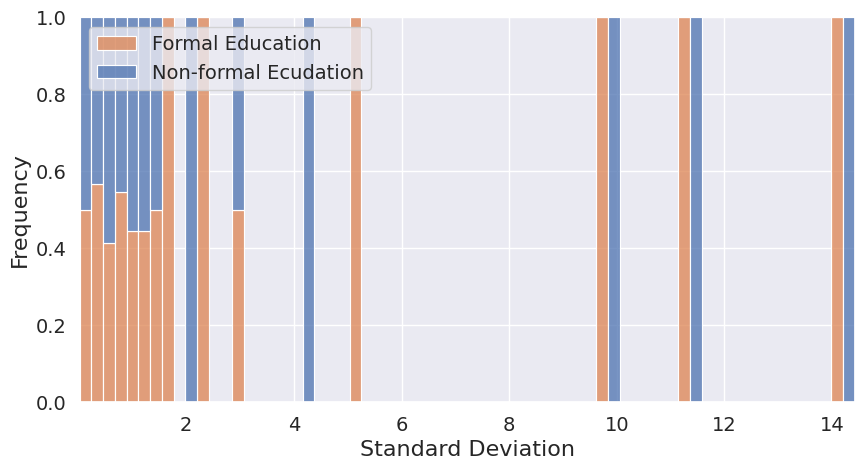

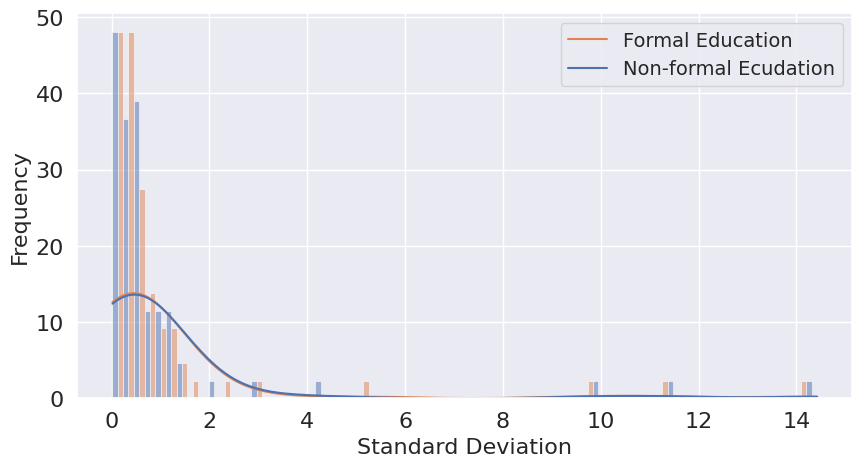

Number of significant features:  67 (0.8701298701298701%)


Formal Education  \
문D1) 귀하께서는 작년에 평생교육 프로그램 관련 정보를 접한 적이 있습니까?  1.0000    24269 (73.96%)   
                                             2.0000     8983 (48.41%)   
문C1) 앞으로 참여하길 희망하는 프로그램은 무엇입니까? (중복응답)1      -1.0000    7148 (60.85%)   
                                             0.0000    11423 (79.51%)   
                                             1.0000        5 (62.50%)   
...                                                               ...   
DQ10. 귀하는 현재 어떤 직업에 종사하고 계십니까?_10.0          1.0000       25 (62.50%)   
문C1) 앞으로 참여하길 희망하는 프로그램은 무엇입니까? (5)문화예술스포츠교육 0.0000    33110 (64.73%)   
DQ10. 귀하는 현재 어떤 직업에 종사하고 계십니까?_11.0          0.0000    33235 (64.73%)   
문C1) 앞으로 참여하길 희망하는 프로그램은 무엇입니까? (5)문화예술스포츠교육 1.0000      142 (64.84%)   
DQ10. 귀하는 현재 어떤 직업에 종사하고 계십니까?_11.0          1.0000       17 (65.38%)   

                                                     Non-formal Ecudation  \
문D1) 귀하께서는 작년에 평생교육 프로그램 관련 정보를 접한 적이 있습니까?  1.0000         8544 (26.04%)   
                                             2.0000         9573 (51.59%)   
문C1) 앞으로 참여하길 희망하는 프로그램은 무엇입니까? (중복응답)1      -1.0000        4599 (39.15%)   
                                             0.0000         2944 (20.49%)   
                                             1.0000            3 (37.50%)   
...                                                                   ...   
DQ10. 귀하는 현재 어떤 직업에 종사하고 계십니까?_10.0          1.0000           15 (37.50%)   
문C1) 앞으로 참여하길 희망하는 프로그램은 무엇입니까? (5)문화예술스포츠교육 0.0000        18040 (35.27%)   
DQ10. 귀하는 현재 어떤 직업에 종사하고 계십니까?_11.0          0.0000        18108 (35.27%)   
문C1) 앞으로 참여하길 희망하는 프로그램은 무엇입니까? (5)문화예술스포츠교육 1.0000           77 (35.16%)   
DQ10. 귀하는 현재 어떤 직업에 종사하고 계십니까?_11.0          1.0000            9 (34.62%)   

                                                                      Statistics  
문D1) 귀하께서는 작년에 평생교육 프로그램 관련 정보를 접한 적이 있습니까?  1.0000   $\chi^2$=3388.53, $p$=0.00  
                                             2.0000                               
문C1) 앞으로 참여하길 희망하는 프로그램은 무엇입니까? (중복응답)1      -1.0000  $\chi^2$=2959.99, $p$=0.00  
                                             0.0000                               
                                             1.0000                               
...                                                                          ...  
DQ10. 귀하는 현재 어떤 직업에 종사하고 계십니까?_10.0          1.0000                               
문C1) 앞으로 참여하길 희망하는 프로그램은 무엇입니까? (5)문화예술스포츠교육 0.0000      $\chi^2$=0.00, $p$=1.00  
DQ10. 귀하는 현재 어떤 직업에 종사하고 계십니까?_11.0          0.0000      $\chi^2$=0.00, $p$=1.00  
문C1) 앞으로 참여하길 희망하는 프로그램은 무엇입니까? (5)문화예술스포츠교육 1.0000                               
DQ10. 귀하는 현재 어떤 직업에 종사하고 계십니까?_11.0          1.0000                               

[434 rows x 3 columns]

Comparison Statistics of X by Y class!
Undersampling...
(41095, 77) (41095, 1)
Ratio of Origin Y:  비형식교육 참여자
0            26629
1            14466
Name: count, dtype: int64
(28932, 77) (28932, 1)
Ratio of Sampling Y:  비형식교육 참여자
0            14466
1            14466
Name: count, dtype: int64

Preprocessing of Scaling...
(28932, 77) (28932, 1) 0.0 1.0000000000000002
(10274, 77) (10274, 1) 0.0 1.0000000000000002
Complete!


In [38]:
X_train, X_test, X_colname, \
Y_train, Y_test = preprocessing_edu(df, Y_colname=Y_colname,
                                    X_custom=X_custom, X_dummy=X_dummy, X_reverse=X_reverse, X_delete=X_delete,
                                    test_size=TEST_SIZE, class_stat=CLASS_STAT,
                                    sampling_method=SAMPLING_METHOD, sampling_strategy=SAMPLING_STRATEGY,
                                    scaler=SCALER, random_state=RANDOM_STATE,
                                    label_list=LABEL_LIST)

# Modeling

## Machine Learing

Learning...:  2025-12-02 00:23:21.346100


  0%|          | 0/10 [00:00<?, ?it/s]

Best Metric Score:  0.6848785062359437
Best Tuning Parameters:  {'solver': 'liblinear', 'penalty': 'l1', 'C': 1.2001244813107927, 'class_weight': 'balanced', 'max_iter': 702, 'random_state': 123, 'multi_class': 'auto'}

Explanations...:  2025-12-02 00:25:12.691194
Explanations of Y:


Features  \
0                                           DQ11. 귀하가 현재 소속되어 있는 직장의 규모는 어느 정도입니까? (사업장^ 상시근로자 기준)   
1                                   문G1-3) 지난 한 해 동안 동아리에서 활동한 적이 있습니까? 있다면^ 몇 회 정도 참여하셨습니까?__참여횟수   
2                                                                   DQ1. 귀하의 최종 학력은 어떻게 되십니까?__학교급   
3                                                             문H1) 귀하께서는 전반적으로 현재의 생활에 얼마나 만족하십니까?   
4                                                      문D1) 귀하께서는 작년에 평생교육 프로그램 관련 정보를 접한 적이 있습니까?   
5   문H2-1) 평생학습 참여가 삶의 질 향상에 얼마나 도움^ 아직 경험이 없다면 삶의 질 향상에 얼마나 도움이 될 것인지 생각하십니까?__1) 정신적 건강(정서적 안정감)   
6                                                                                         학습 지향 평균   
7                                                          문C1) 앞으로 참여하길 희망하는 프로그램은 무엇입니까? (중복응답)1   
8                                                     문C1) 앞으로 참여하길 희망하는 프로그램은 무엇입니까? (1)학위취득을위한교육   
9                                                            DQ12. 귀하의 현재 직장에서의 근무기간은 얼마나 되십니까?__년   
10                                                     문C1) 앞으로 참여하길 희망하는 프로그램은 무엇입니까? (3)직업능력향상교육   
11                                                                                            만 연령   
12                                                                               무형식학습 (암묵적 학습) 참여   
13                                                                                            경활상태   
14                                                    문C1) 앞으로 참여하길 희망하는 프로그램은 무엇입니까? (2)성인기초및문해교육   
15               문E1-4) 자신의 학습패턴에 관하여 어느 정도 동의하시는지 동의 정도를 말씀해주시기 바랍니다.__나는 다른 사람들과 함께 공부 하는 것이 좋다.   
16                                                             DQ1. 귀하의 최종 학력은 어떻게 되십니까?__상태구분_9.0   
17                                                              DQ10. 귀하는 현재 어떤 직업에 종사하고 계십니까?_2.0   
18                                                                                    직업관련 목표지향 평균   
19                                                                      DQ7. 귀하의 주된 소득원천은 무엇입니까?_5   
20                                                                                              성별   
21                                                                                            사회참여   
22                                                       문C1) 앞으로 참여하길 희망하는 프로그램은 무엇입니까? (4)인문교양교육   
23                                                              DQ10. 귀하는 현재 어떤 직업에 종사하고 계십니까?_3.0   
24                                                                       DQ3. 몇 명과 함께 지내고 있습니까?__명   
25            문F1-4) 다음 학습 관련 질문에 어느 정도 동의하시는지 동의 정도를 말씀해주시기 바랍니다.__직장에서 필요로 하는 기술을 학교에서는 배울 수 없다.   
26                                                                                        형식교육 참여자   
27                                                         DQ5. 귀하께서는 취학 전의 손자·손녀가 있습니까? (동거여부 무관)   
28                                                                                           지역규모별   
29                                                             DQ1. 귀하의 최종 학력은 어떻게 되십니까?__상태구분_0.0   
30                                                                                            취약계층   
31                                                                       DQ6. 귀하께서는 건강에 자신 있습니까?_1   
32                                                              DQ10. 귀하는 현재 어떤 직업에 종사하고 계십니까?_7.0   
33                                                                                   무형식학습(온라인) 참여   
34                                                              DQ10. 귀하는 현재 어떤 직업에 종사하고 계십니까?_1.0   
35                                                                      DQ7. 귀하의 주된 소득원천은 무엇입니까?_3   
36                                                              DQ10. 귀하는 현재 어떤 직업에 종사하고 계십니까?_6.0   
37                                                                                          연령별(1)   
38                                                                 DQ9. 귀하의 현재 고용형태는 어떻게 되십니까?_0.0   
39        

Performance Evaluations...:  2025-12-02 00:25:12.699235
Performance: 


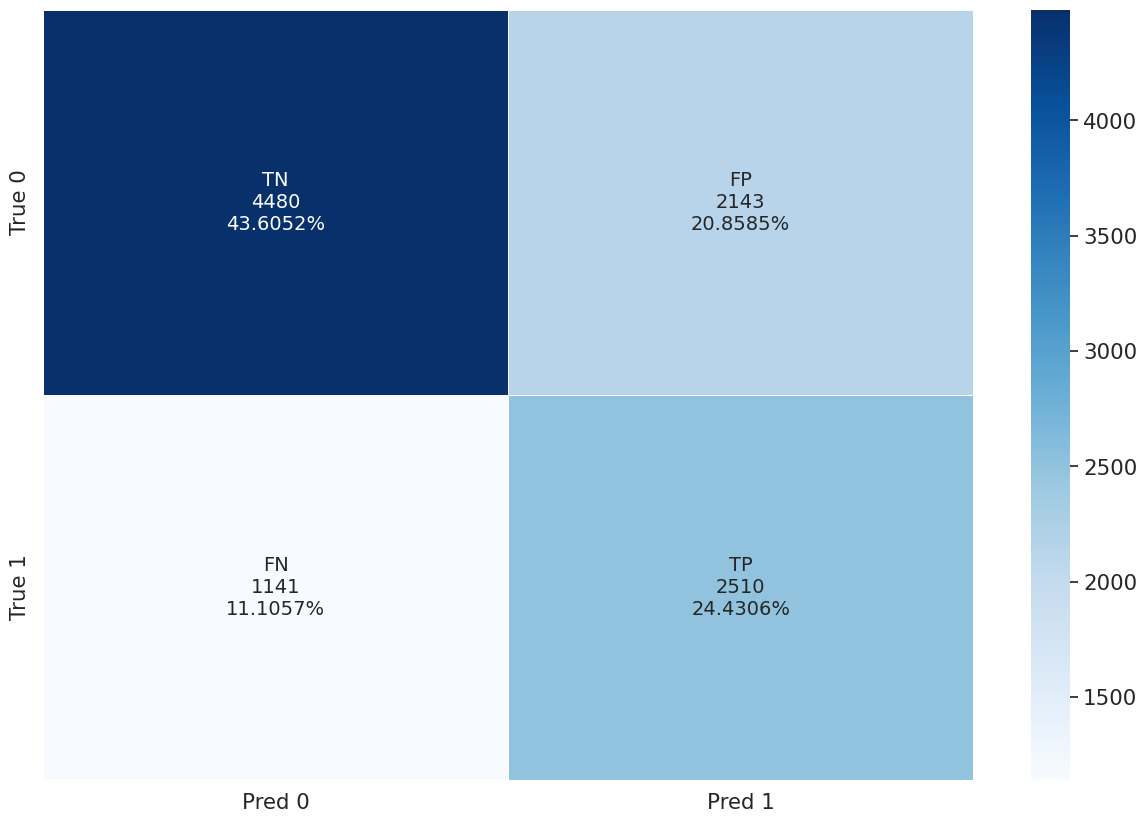

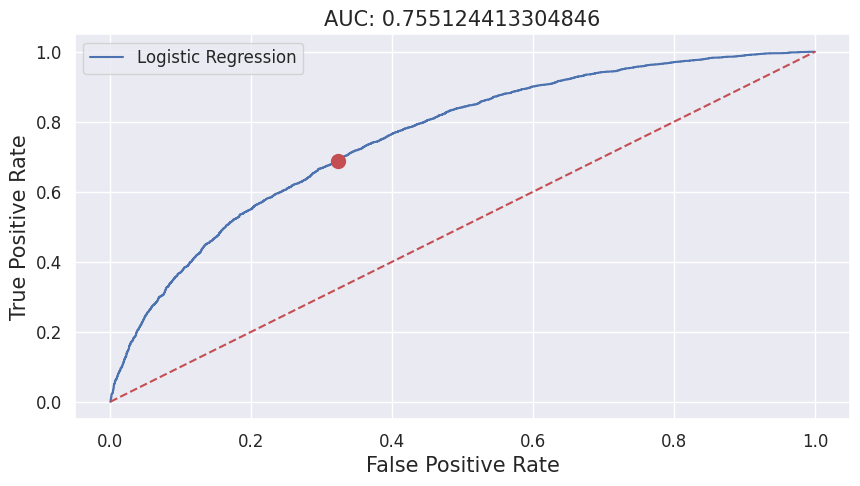

LogisticRegression(C=1.2001244813107927, class_weight='balanced', max_iter=702,
                   penalty='l1', random_state=123, solver='liblinear')

{'solver': 'liblinear',
 'penalty': 'l1',
 'C': 1.2001244813107927,
 'class_weight': 'balanced',
 'max_iter': 702,
 'random_state': 123,
 'multi_class': 'auto'}

Algorithm            Dataset      N True Positive True Negative  \
0  Logistic Regression          Train set  28932          9901          9951   
1  Logistic Regression           Test set  10274          2510          4480   
2  Logistic Regression  Entire population  39206         12411         14431   

  False Positive False Negative Precision Recall Specificity F1-score  \
0           4515           4565    0.6868 0.6844      0.6879   0.6856   
1           2143           1141    0.5394 0.6875      0.6764   0.6045   
2           6658           5706    0.6508 0.6850      0.6843   0.6675   

  Accuracy Balanced Accuracy    AUC  
0   0.6862            0.6862 0.7541  
1   0.6804            0.6820 0.7551  
2   0.6846            0.6847 0.7540

In [43]:
model_lr, params_lr, Scores_lr = modeling_LogisticRegression(X_train, Y_train, X_test, Y_test, 
                                                             X_colname=X_colname, params=None,
                                                             tune_trials=TUNE_TRIALS,
                                                             cv_splits=CV_SPLITS,
                                                             tune_metric=TUNE_METRIC,
                                                             shap=not SHAP, 
                                                             interaction=not INTERACTION,
                                                             interaction_samples=INTERACTION_SAMPLES,
                                                             X_top_display=X_TOP_DISPLAY, 
                                                             label_list=LABEL_LIST)
display(model_lr, params_lr, Scores_lr)

Learning...:  2025-12-02 00:25:13.313782


  0%|          | 0/10 [00:00<?, ?it/s]

Best Metric Score:  0.7141902475853826
Best Tuning Parameters:  {'n_estimators': 300, 'max_depth': 23, 'max_features': 0.541429767469549, 'min_samples_split': 4, 'min_samples_leaf': 3, 'bootstrap': True, 'random_state': 123, 'n_jobs': -1, 'class_weight': 'balanced_subsample'}

Explanations...:  2025-12-02 00:26:41.972219
Explanations of Y:


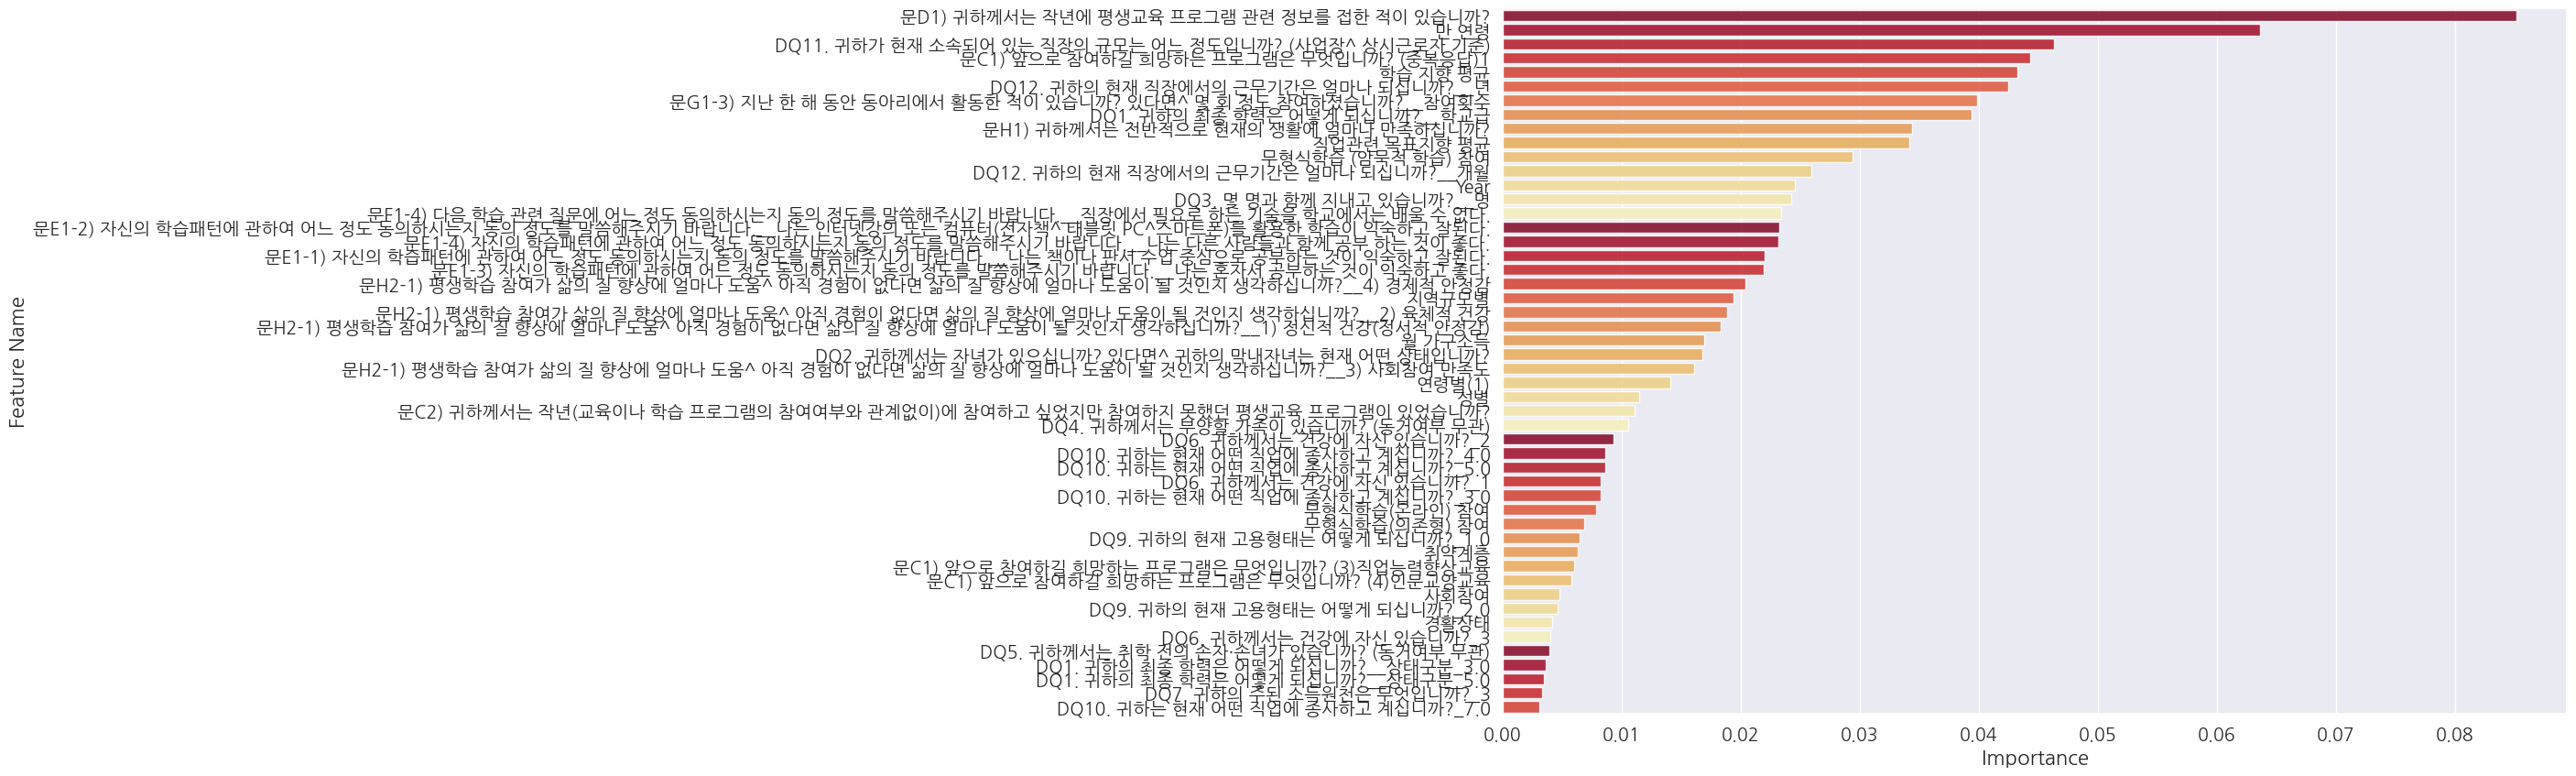

Performance Evaluations...:  2025-12-02 00:26:42.628695
Performance: 


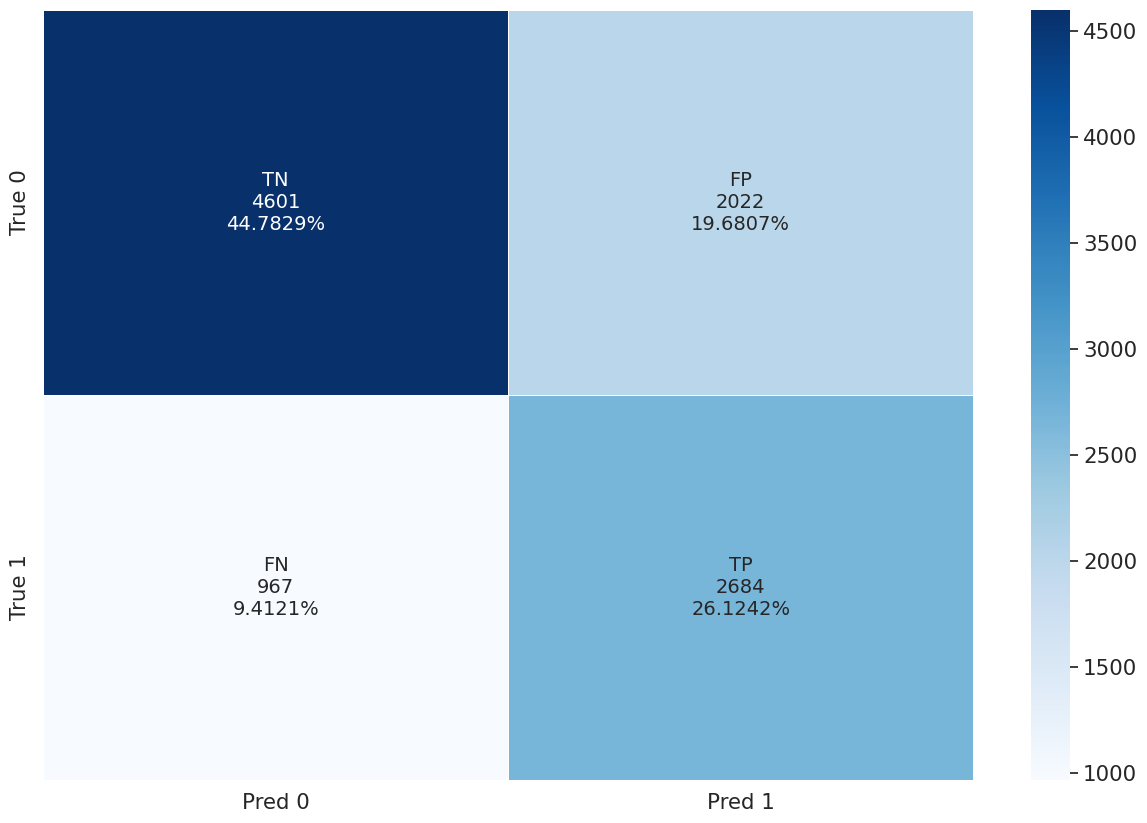

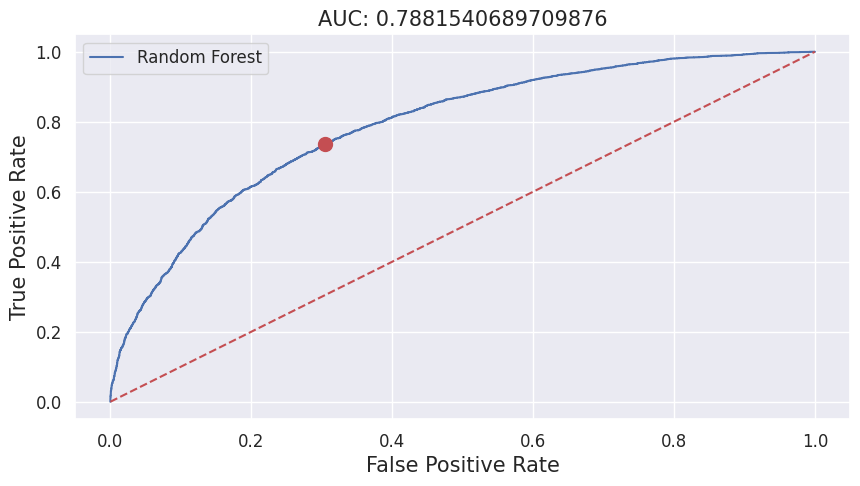

RandomForestClassifier(class_weight='balanced_subsample', max_depth=23,
                       max_features=0.541429767469549, min_samples_leaf=3,
                       min_samples_split=4, n_estimators=300, n_jobs=-1,
                       random_state=123)

{'n_estimators': 300,
 'max_depth': 23,
 'max_features': 0.541429767469549,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'bootstrap': True,
 'random_state': 123,
 'n_jobs': -1,
 'class_weight': 'balanced_subsample'}

Algorithm            Dataset      N True Positive True Negative  \
0  Random Forest          Train set  28932         14190         14236   
1  Random Forest           Test set  10274          2684          4601   
2  Random Forest  Entire population  39206         16874         18837   

  False Positive False Negative Precision Recall Specificity F1-score  \
0            230            276    0.9840 0.9809      0.9841   0.9825   
1           2022            967    0.5703 0.7351      0.6947   0.6423   
2           2252           1243    0.8823 0.9314      0.8932   0.9062   

  Accuracy Balanced Accuracy    AUC  
0   0.9825            0.9825 0.9987  
1   0.7091            0.7149 0.7882  
2   0.9109            0.9123 0.9650

In [44]:
model_rf, params_rf, Scores_rf = modeling_RandomForestClassifier(X_train, Y_train, X_test, Y_test, 
                                                             X_colname=X_colname, params=None,
                                                             tune_trials=TUNE_TRIALS,
                                                             cv_splits=CV_SPLITS,
                                                             tune_metric=TUNE_METRIC,
                                                             shap=not SHAP, 
                                                             interaction=not INTERACTION,
                                                             interaction_samples=INTERACTION_SAMPLES,
                                                             X_top_display=X_TOP_DISPLAY, 
                                                             label_list=LABEL_LIST)
display(model_rf, params_rf, Scores_rf)

Learning...:  2025-12-02 00:26:43.378961


  0%|          | 0/10 [00:00<?, ?it/s]

Best Metric Score:  0.7364110047420018
Best Tuning Parameters:  {'n_estimators': 850, 'max_depth': 9, 'learning_rate': 0.022426975249527473, 'subsample': 0.7609151989764531, 'colsample_bytree': 0.9262295449460349, 'min_child_weight': 3.4519951288418858, 'reg_alpha': 1.5822289098296794e-07, 'reg_lambda': 1.958537028129312e-08, 'random_state': 123, 'n_jobs': -1, 'tree_method': 'hist', 'verbosity': 0, 'scale_pos_weight': 4.9060644255350905}

Explanations...:  2025-12-02 00:27:29.682655
Explanations of Y:


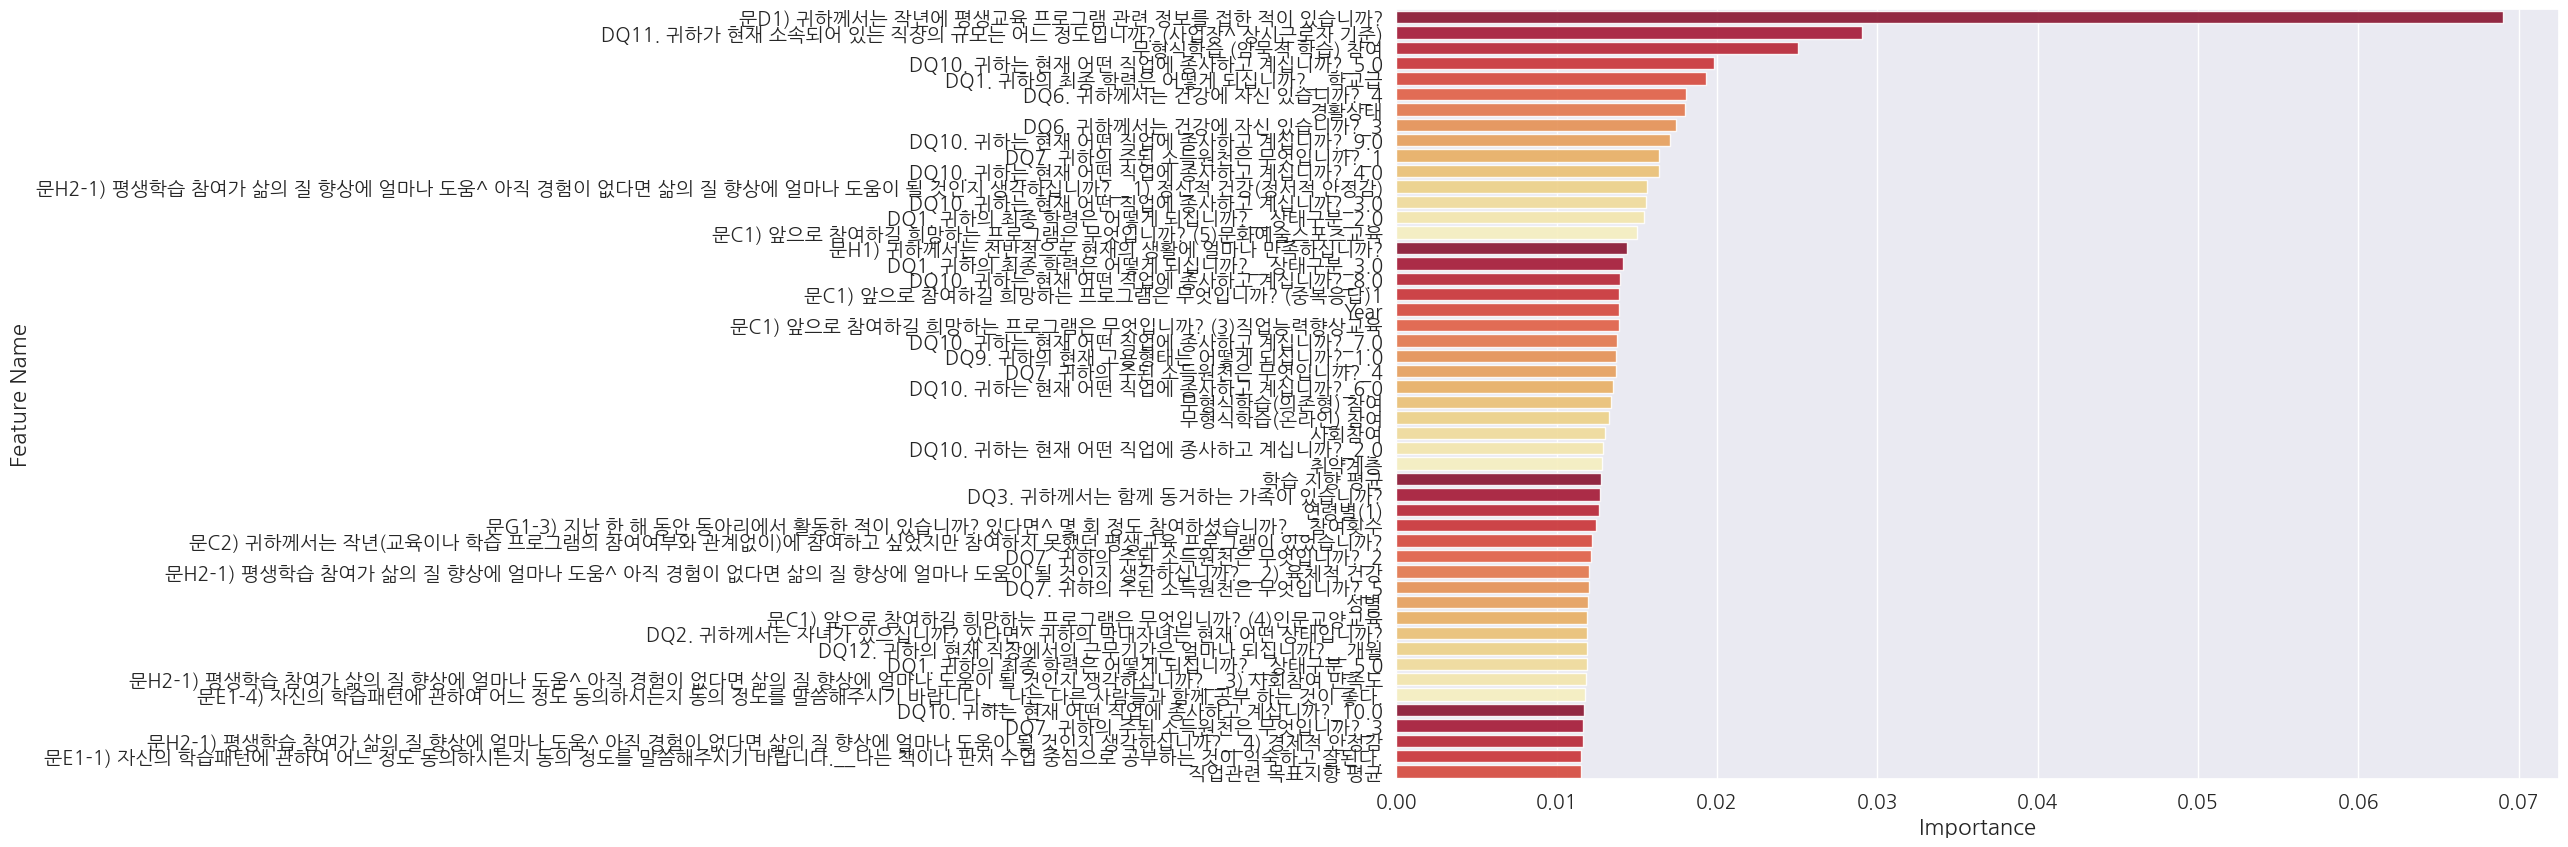

Performance Evaluations...:  2025-12-02 00:27:30.009400
Performance: 


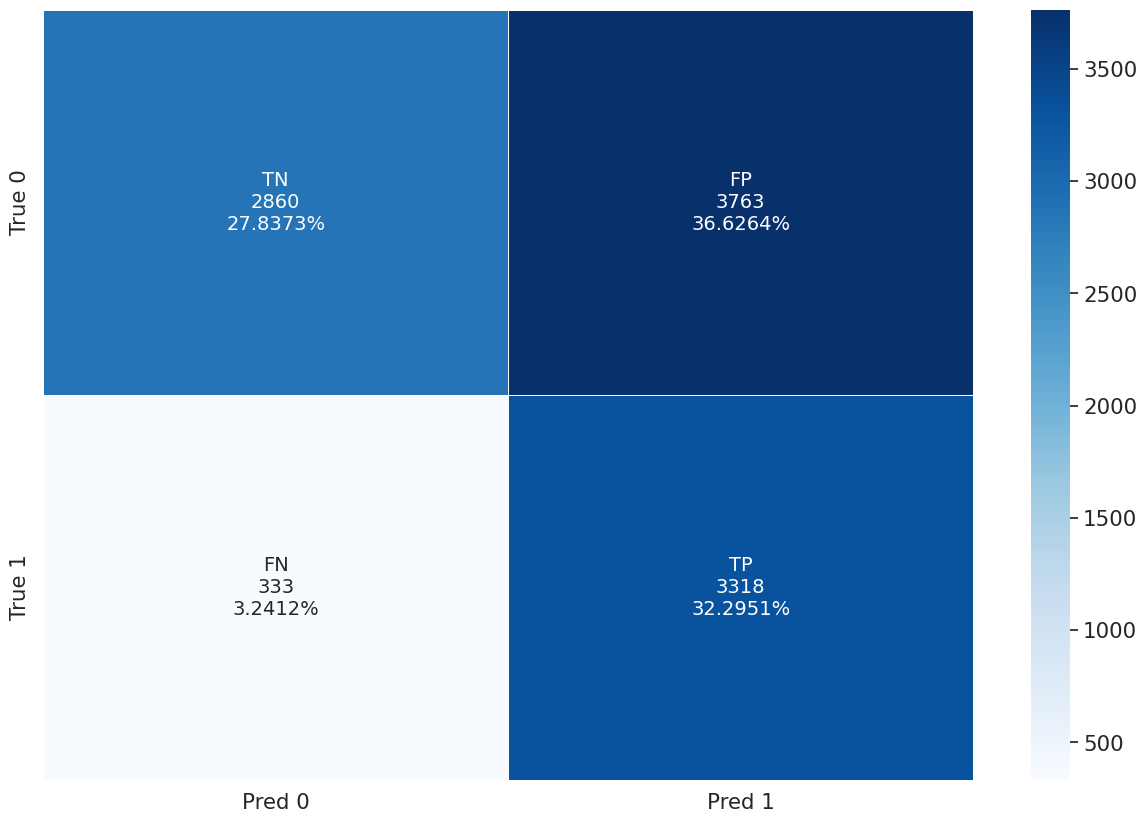

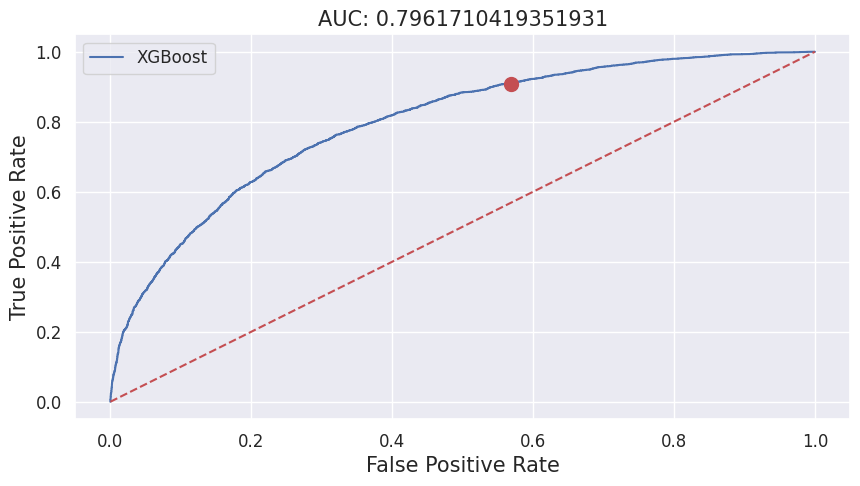

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9262295449460349, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.022426975249527473,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=3.4519951288418858, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=850,
              n_jobs=-1, num_parallel_tree=None, ...)

{'n_estimators': 850,
 'max_depth': 9,
 'learning_rate': 0.022426975249527473,
 'subsample': 0.7609151989764531,
 'colsample_bytree': 0.9262295449460349,
 'min_child_weight': 3.4519951288418858,
 'reg_alpha': 1.5822289098296794e-07,
 'reg_lambda': 1.958537028129312e-08,
 'random_state': 123,
 'n_jobs': -1,
 'tree_method': 'hist',
 'verbosity': 0,
 'scale_pos_weight': 4.9060644255350905}

Algorithm            Dataset      N True Positive True Negative  \
0   XGBoost          Train set  28932         14463         10305   
1   XGBoost           Test set  10274          3318          2860   
2   XGBoost  Entire population  39206         17781         13165   

  False Positive False Negative Precision Recall Specificity F1-score  \
0           4161              3    0.7766 0.9998      0.7124   0.8742   
1           3763            333    0.4686 0.9088      0.4318   0.6183   
2           7924            336    0.6917 0.9815      0.6243   0.8115   

  Accuracy Balanced Accuracy    AUC  
0   0.8561            0.8561 0.9937  
1   0.6013            0.6703 0.7962  
2   0.7893            0.8029 0.9563

In [45]:
model_xgb, params_xgb, Scores_xgb = modeling_XGBClassifier(X_train, Y_train, X_test, Y_test, 
                                                             X_colname=X_colname, params=None,
                                                             tune_trials=TUNE_TRIALS,
                                                             cv_splits=CV_SPLITS,
                                                             tune_metric=TUNE_METRIC,
                                                             shap=not SHAP, 
                                                             interaction=not INTERACTION,
                                                             interaction_samples=INTERACTION_SAMPLES,
                                                             X_top_display=X_TOP_DISPLAY, 
                                                             label_list=LABEL_LIST)
display(model_xgb, params_xgb, Scores_xgb)

Learning...:  2025-12-02 00:27:30.509710


  0%|          | 0/10 [00:00<?, ?it/s]

Best Metric Score:  0.7202994359884122
Best Tuning Parameters:  {'n_estimators': 800, 'learning_rate': 0.018052096095236624, 'num_leaves': 145, 'max_depth': 15, 'min_child_samples': 16, 'subsample': 0.6361774675906615, 'colsample_bytree': 0.8222641885148195, 'reg_alpha': 0.0011075399865014598, 'reg_lambda': 0.6917846826162954, 'random_state': 123, 'n_jobs': -1, 'class_weight': None}

Explanations...:  2025-12-02 00:35:18.020435
Explanations of Y:


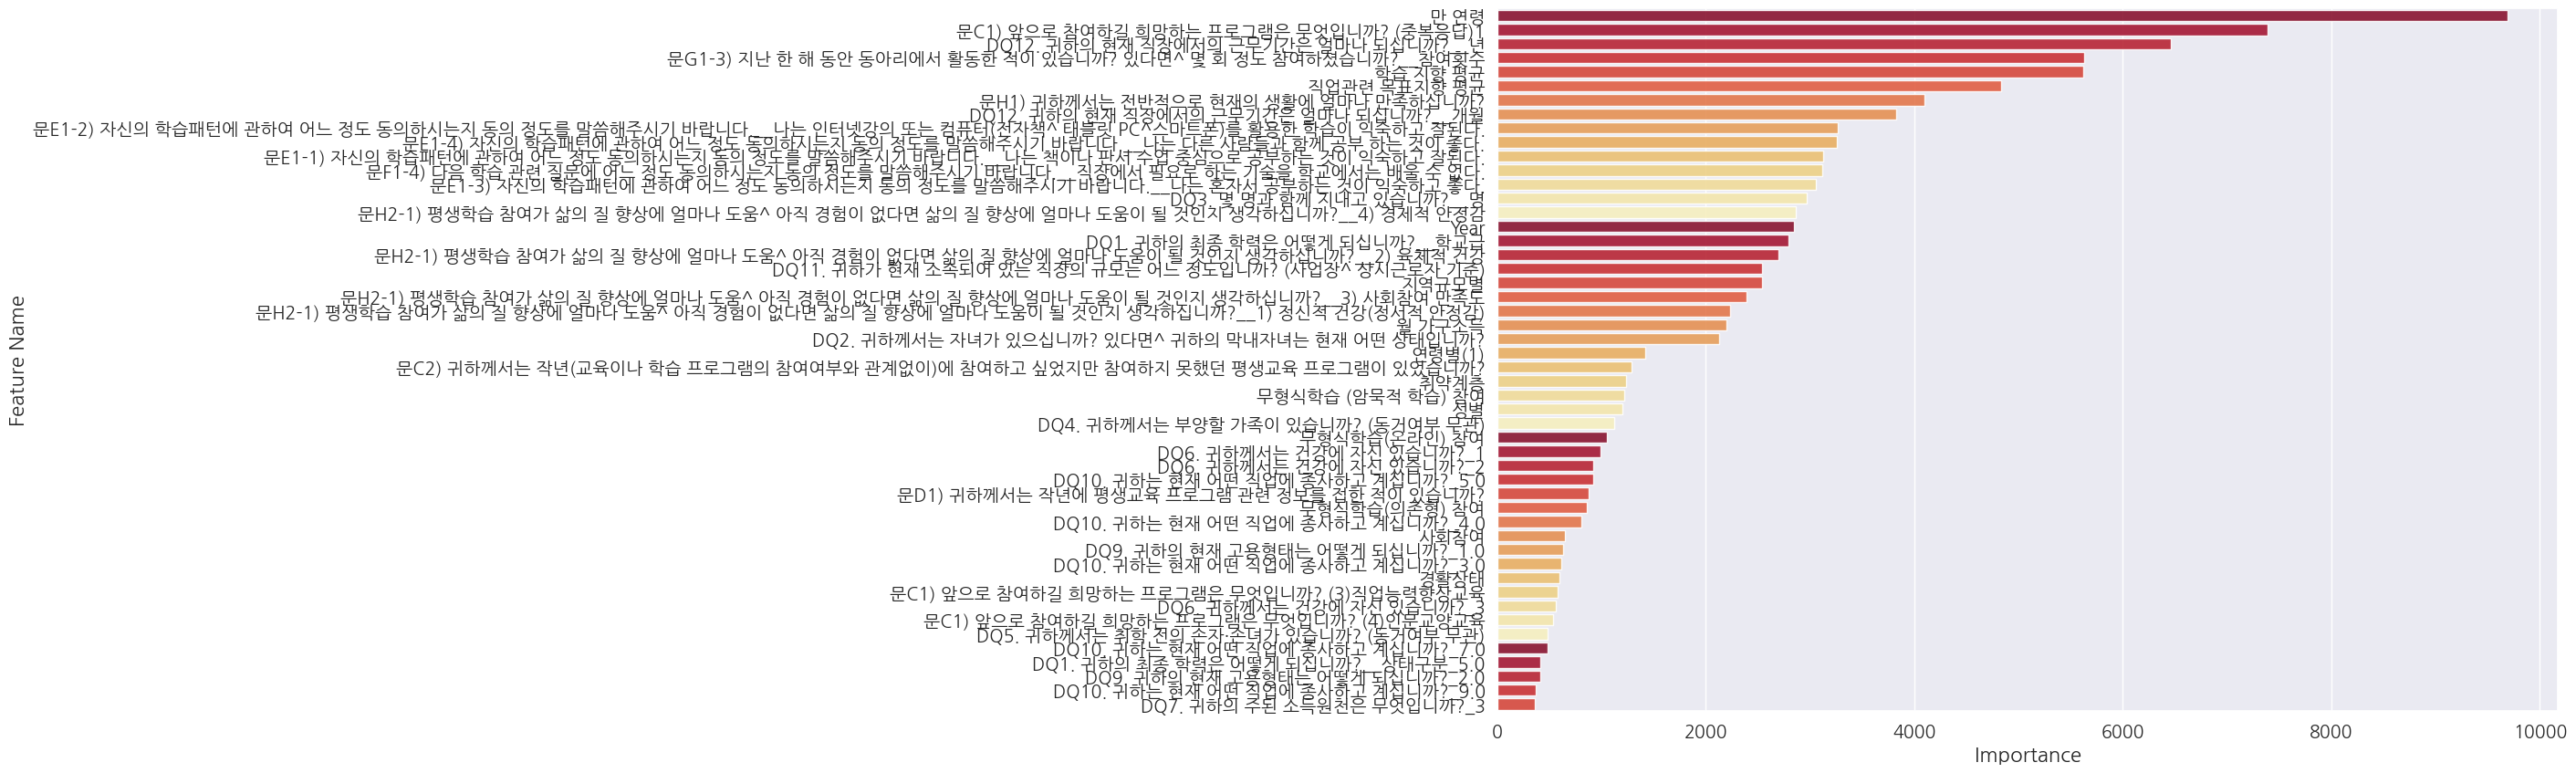

Performance Evaluations...:  2025-12-02 00:35:18.356467
Performance: 


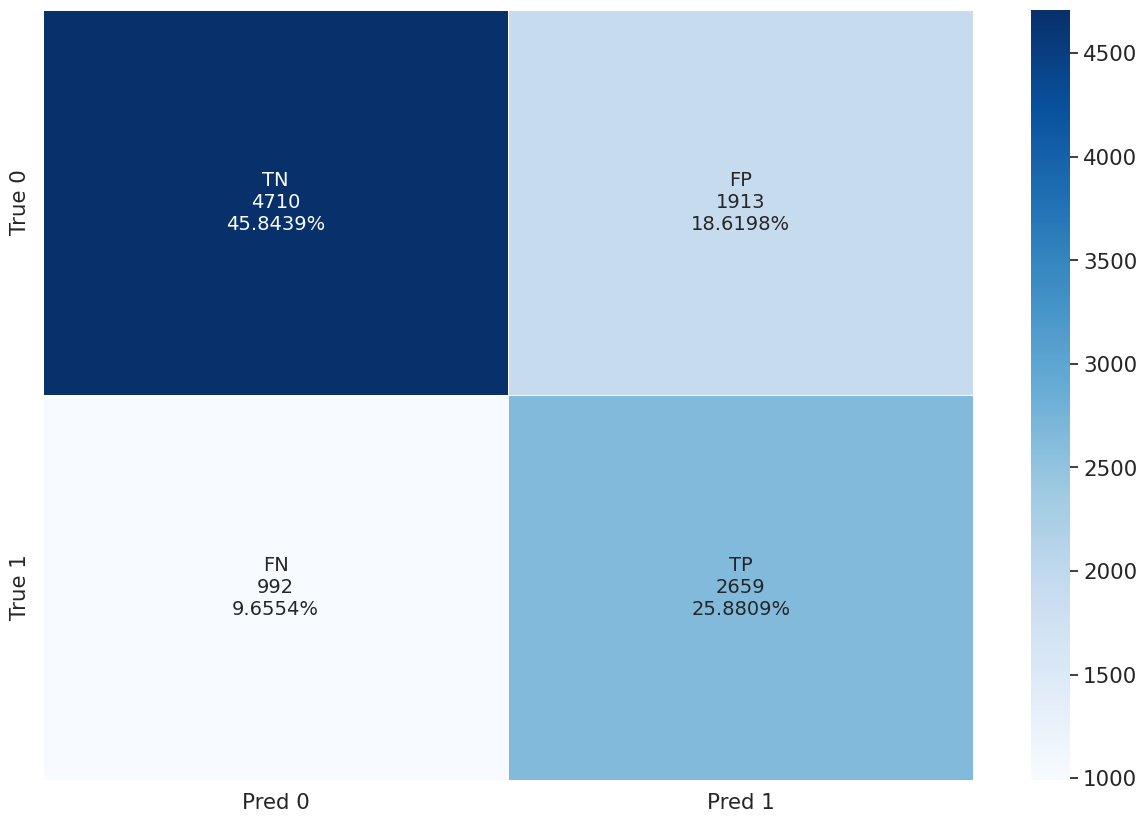

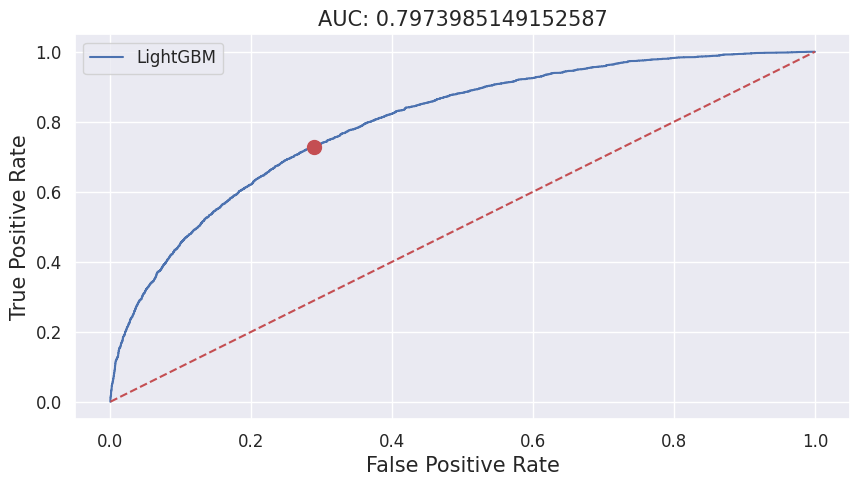

LGBMClassifier(colsample_bytree=0.8222641885148195,
               learning_rate=0.018052096095236624, max_depth=15,
               min_child_samples=16, n_estimators=800, n_jobs=-1,
               num_leaves=145, random_state=123,
               reg_alpha=0.0011075399865014598, reg_lambda=0.6917846826162954,
               subsample=0.6361774675906615)

{'n_estimators': 800,
 'learning_rate': 0.018052096095236624,
 'num_leaves': 145,
 'max_depth': 15,
 'min_child_samples': 16,
 'subsample': 0.6361774675906615,
 'colsample_bytree': 0.8222641885148195,
 'reg_alpha': 0.0011075399865014598,
 'reg_lambda': 0.6917846826162954,
 'random_state': 123,
 'n_jobs': -1,
 'class_weight': None}

Algorithm            Dataset      N True Positive True Negative  \
0  LightGBM          Train set  28932         13295         13458   
1  LightGBM           Test set  10274          2659          4710   
2  LightGBM  Entire population  39206         15954         18168   

  False Positive False Negative Precision Recall Specificity F1-score  \
0           1008           1171    0.9295 0.9191      0.9303   0.9243   
1           1913            992    0.5816 0.7283      0.7112   0.6467   
2           2921           2163    0.8452 0.8806      0.8615   0.8626   

  Accuracy Balanced Accuracy    AUC  
0   0.9247            0.9247 0.9788  
1   0.7172            0.7197 0.7974  
2   0.8703            0.8711 0.9386

In [46]:
model_lgbm, params_lgbm, Scores_lgbm = modeling_LGBMClassifier(X_train, Y_train, X_test, Y_test, 
                                                             X_colname=X_colname, params=None,
                                                             tune_trials=TUNE_TRIALS,
                                                             cv_splits=CV_SPLITS,
                                                             tune_metric=TUNE_METRIC,
                                                             shap=not SHAP, 
                                                             interaction=not INTERACTION,
                                                             interaction_samples=INTERACTION_SAMPLES, 
                                                             X_top_display=X_TOP_DISPLAY, 
                                                             label_list=LABEL_LIST)
display(model_lgbm, params_lgbm, Scores_lgbm)

Learning...:  2025-12-02 00:35:18.881428


  0%|          | 0/10 [00:00<?, ?it/s]

Best Metric Score:  0.7022802318610631
Best Tuning Parameters:  {'iterations': 200, 'depth': 5, 'learning_rate': 0.06839610812684159, 'l2_leaf_reg': 9.063317584437971, 'subsample': 0.6522156825859352, 'random_state': 123, 'verbose': 0, 'allow_writing_files': False}

Explanations...:  2025-12-02 00:36:39.127696
Explanations of Y:


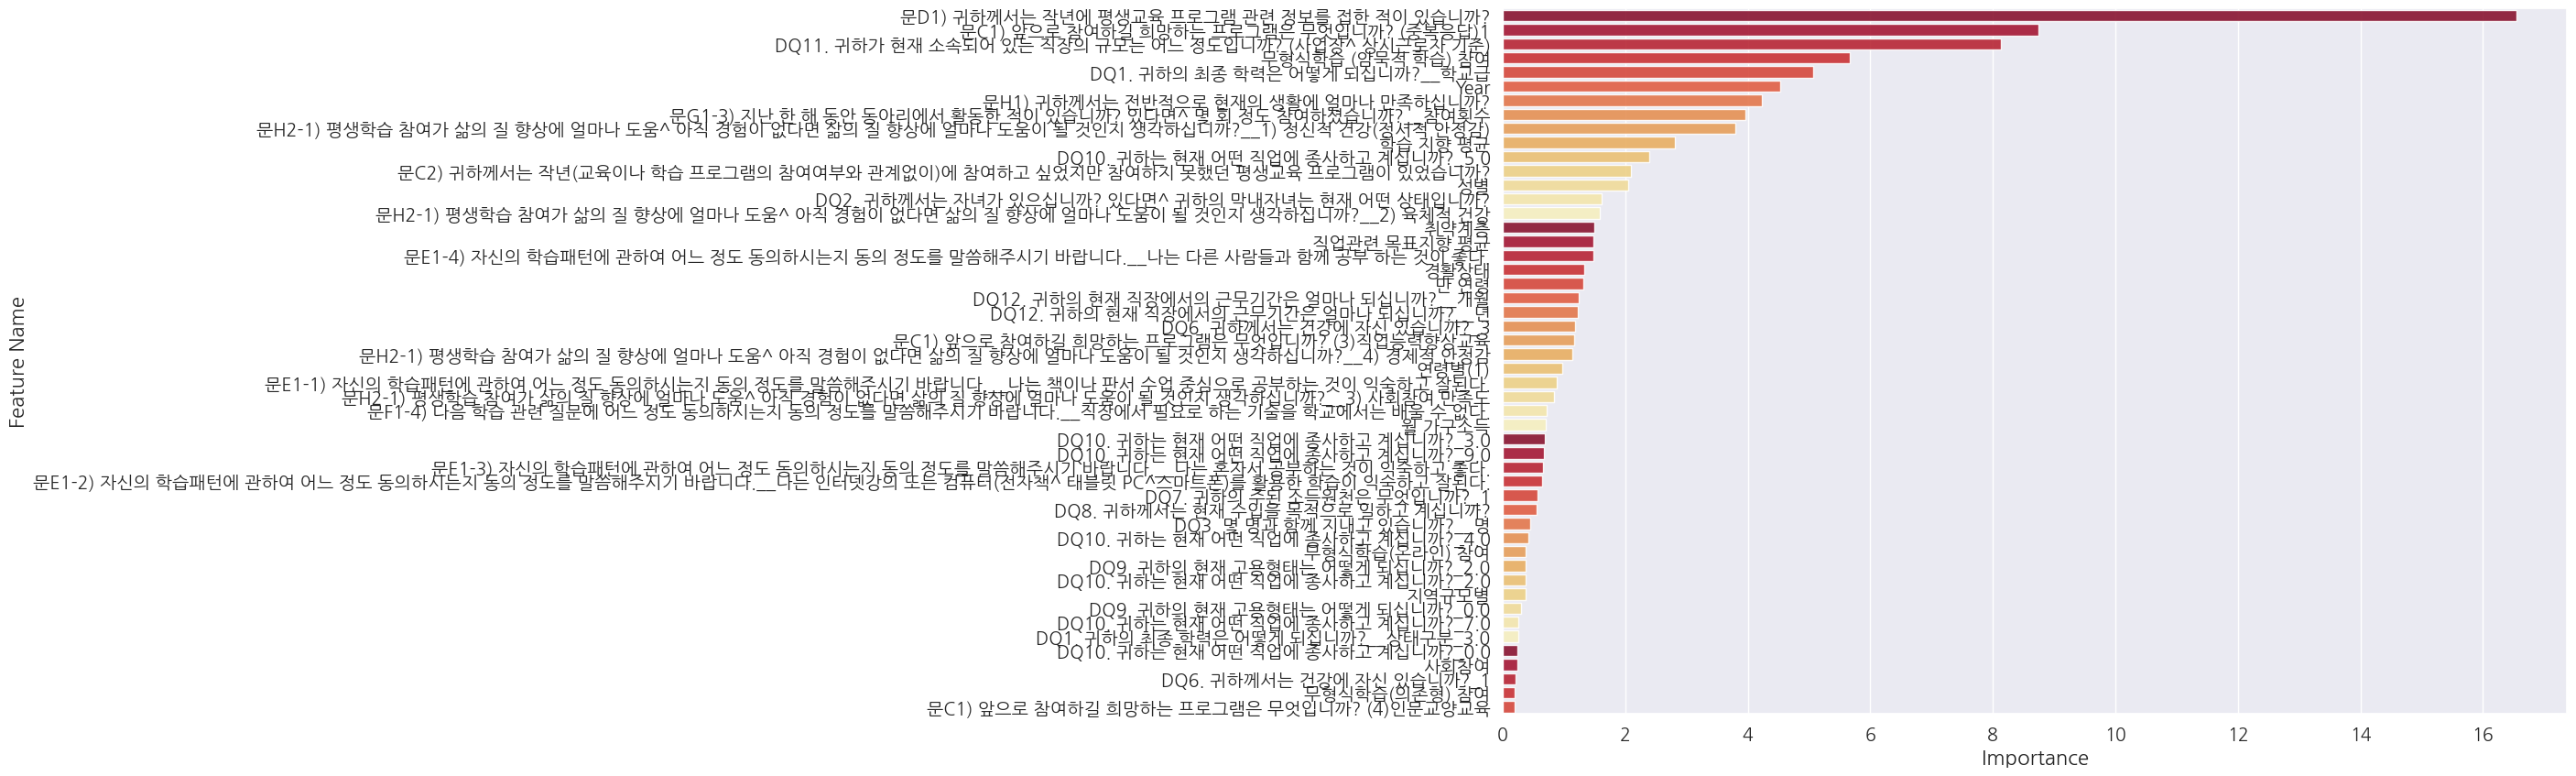

Performance Evaluations...:  2025-12-02 00:36:39.469603
Performance: 


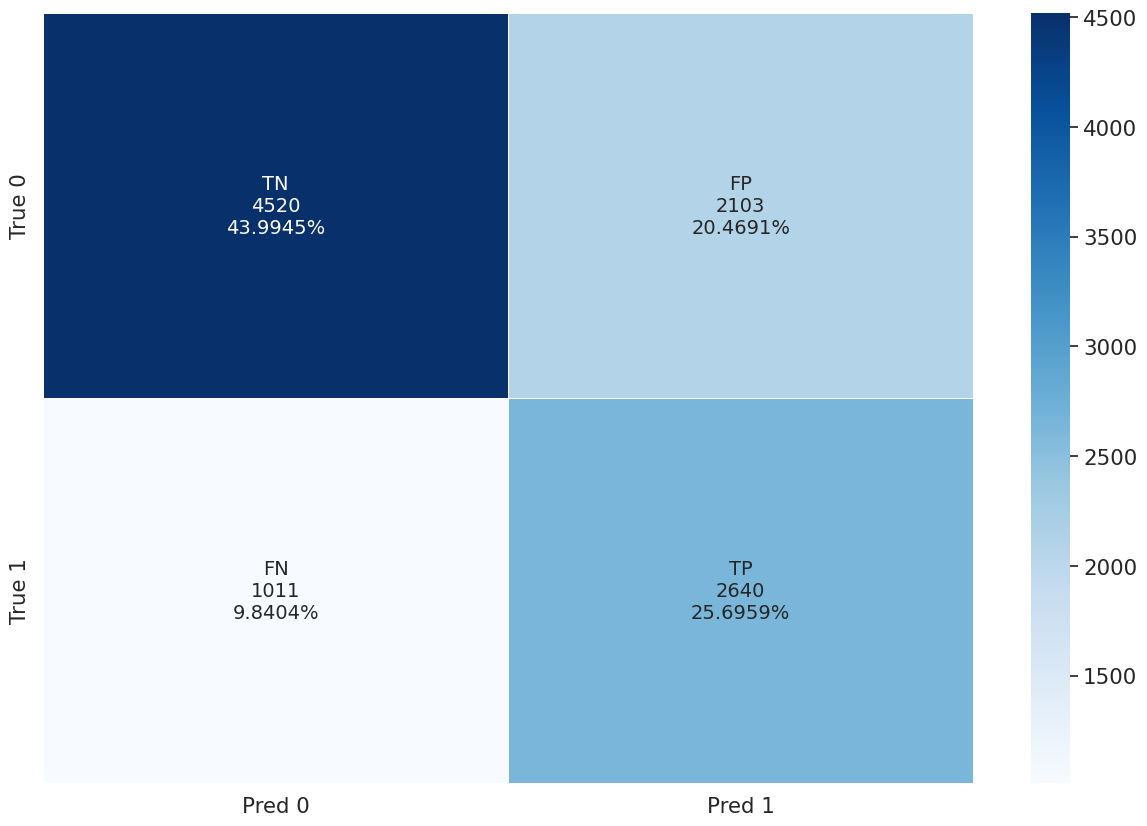

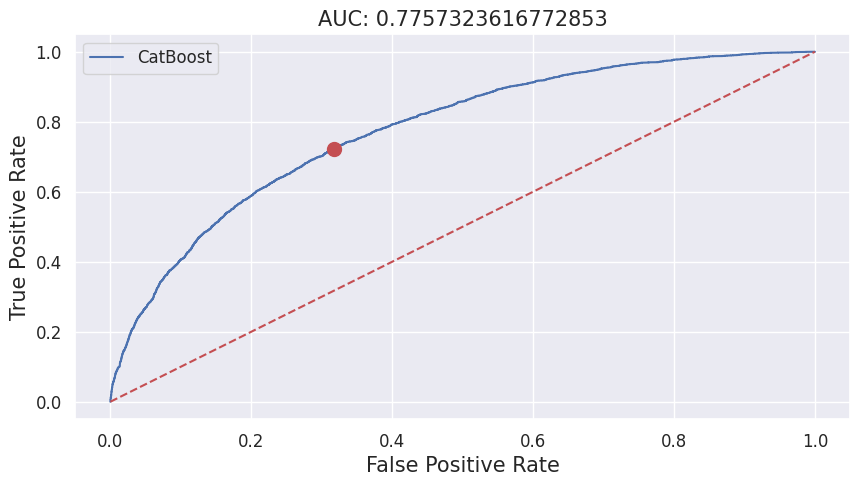

{'iterations': 200,
 'depth': 5,
 'learning_rate': 0.06839610812684159,
 'l2_leaf_reg': 9.063317584437971,
 'subsample': 0.6522156825859352,
 'random_state': 123,
 'verbose': 0,
 'allow_writing_files': False}

Algorithm            Dataset      N True Positive True Negative  \
0  CatBoost          Train set  28932         10579         10117   
1  CatBoost           Test set  10274          2640          4520   
2  CatBoost  Entire population  39206         13219         14637   

  False Positive False Negative Precision Recall Specificity F1-score  \
0           4349           3887    0.7087 0.7313      0.6994   0.7198   
1           2103           1011    0.5566 0.7231      0.6825   0.6290   
2           6452           4898    0.6720 0.7296      0.6941   0.6996   

  Accuracy Balanced Accuracy    AUC  
0   0.7153            0.7153 0.7917  
1   0.6969            0.7028 0.7757  
2   0.7105            0.7119 0.7873

In [47]:
model_catb, params_catb, Scores_catb = modeling_CatBoostClassifier(X_train, Y_train, X_test, Y_test, 
                                                             X_colname=X_colname, params=None,
                                                             tune_trials=TUNE_TRIALS,
                                                             cv_splits=CV_SPLITS,
                                                             tune_metric=TUNE_METRIC,
                                                             shap=not SHAP, 
                                                             interaction=not INTERACTION,
                                                             interaction_samples=INTERACTION_SAMPLES,
                                                             X_top_display=X_TOP_DISPLAY, 
                                                             label_list=LABEL_LIST)
display(model_catb, params_catb, Scores_catb)

In [48]:
# Summary
folder_location = os.path.join(os.getcwd(),'Result')
prediction_summary(folder_location=folder_location, 
                   algonames=['Logistic Regression', 'Random Forest', 'XGBoost', 'LightGBM', 'CatBoost'])
                   # algonames=['Logistic Regression', 'Random Forest', 'XGBoost', 'LightGBM', 'CatBoost', 'MLP', 'CNN'])


PermissionError: [Errno 13] Permission denied: '/mnt/c/DataScience/[DIVE]/Project/EducationCompetition/Result/Performance.csv'

## Deep Learning

### MLP

  0%|          | 0/10 [00:00<?, ?it/s]

Training Progress:   0%|                                                                       | 0/2000 [00:00<?, ?it/s]WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
I0000 00:00:1764610130.161935    2103 service.cc:152] XLA service 0x7d8264002ce0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1764610130.161956    2103 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
I0000 00:00:1764610130.161958    2103 service.cc:160]   StreamExecutor device (1): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2025-12-02 02:28:50.214632: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1764610130.438363    2103 cuda_dnn.cc:529] Loaded cuDNN version 90501
I0000 00:00:1764610132.699764    2103 device_compiler.h:188] Compiled cluster using XLA!  This 

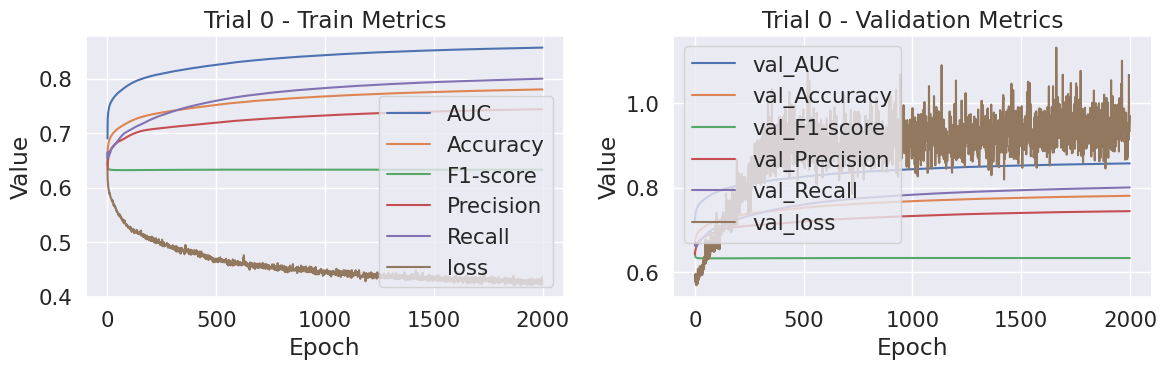

Training Progress: 100%|████████████████████████████████████████████████████████████| 2000/2000 [29:20<00:00,  1.14it/s]


322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


Training Progress: 100%|████████████████████████████████████████████████████████████| 2000/2000 [31:37<00:00,  1.12it/s]

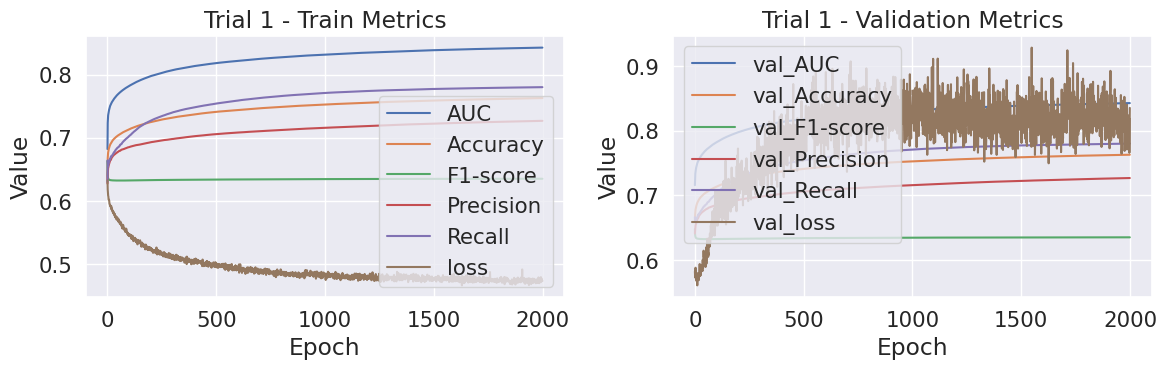

Training Progress: 100%|████████████████████████████████████████████████████████████| 2000/2000 [31:38<00:00,  1.05it/s]


322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Training Progress: 100%|██████████████████████████████████████████████████████████| 2000/2000 [1:51:33<00:00,  3.38s/it]

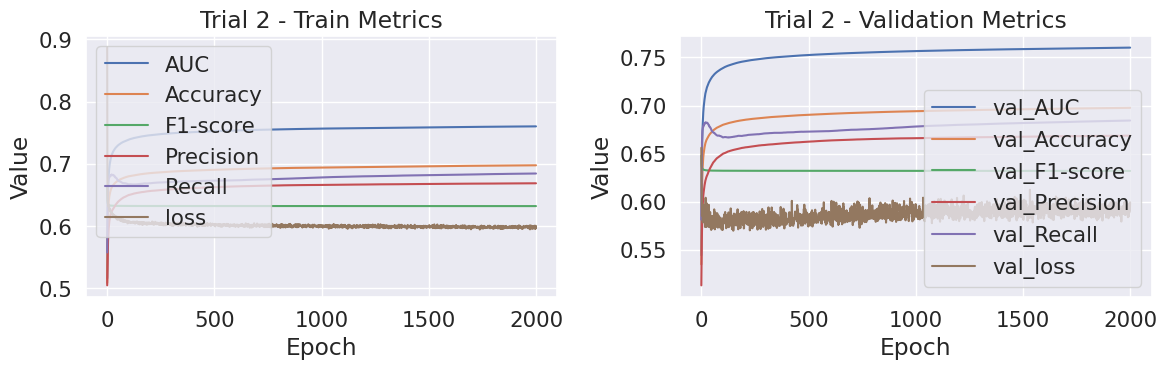

Training Progress: 100%|██████████████████████████████████████████████████████████| 2000/2000 [1:51:34<00:00,  3.35s/it]


322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Training Progress: 100%|████████████████████████████████████████████████████████████| 2000/2000 [32:48<00:00,  1.06it/s]

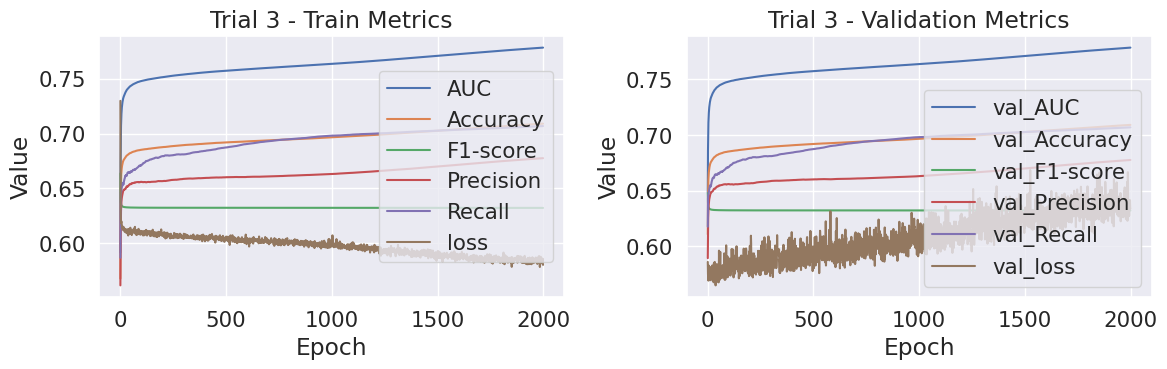

Training Progress: 100%|████████████████████████████████████████████████████████████| 2000/2000 [32:49<00:00,  1.02it/s]


322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Training Progress: 100%|██████████████████████████████████████████████████████████| 2000/2000 [1:52:57<00:00,  3.27s/it]

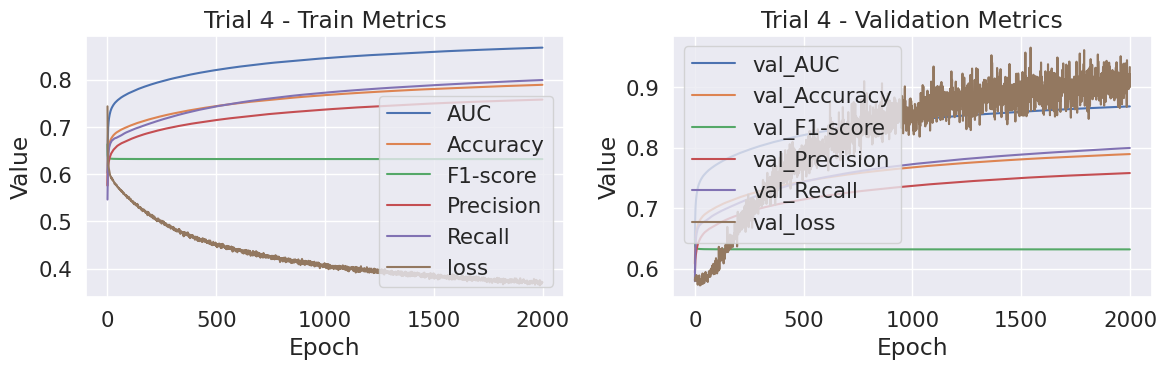

Training Progress: 100%|██████████████████████████████████████████████████████████| 2000/2000 [1:52:58<00:00,  3.39s/it]

  1/322 ━━━━━━━━━━━━━━━━━━━━ 52s 163ms/step

322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Training Progress:  30%|██████████████████▏                                          | 596/2000 [17:15<40:30,  1.73s/it]

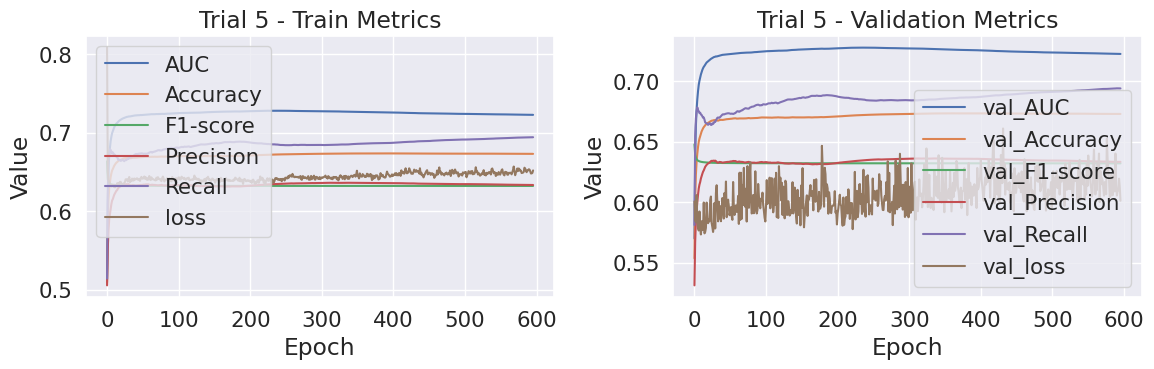

Training Progress:  30%|██████████████████▏                                          | 596/2000 [17:16<40:40,  1.74s/it]


322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Training Progress: 100%|██████████████████████████████████████████████████████████| 2000/2000 [1:55:17<00:00,  3.47s/it]

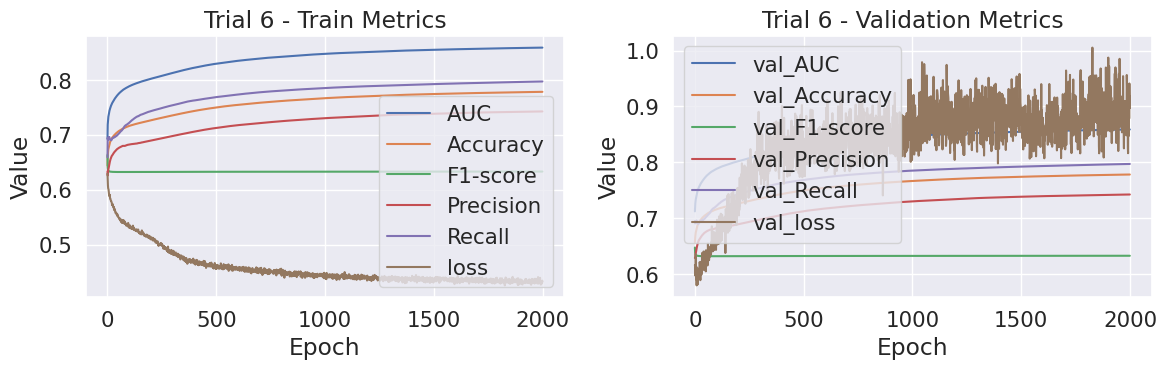

Training Progress: 100%|██████████████████████████████████████████████████████████| 2000/2000 [1:55:18<00:00,  3.46s/it]


322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Training Progress: 100%|████████████████████████████████████████████████████████████| 2000/2000 [32:01<00:00,  1.03it/s]

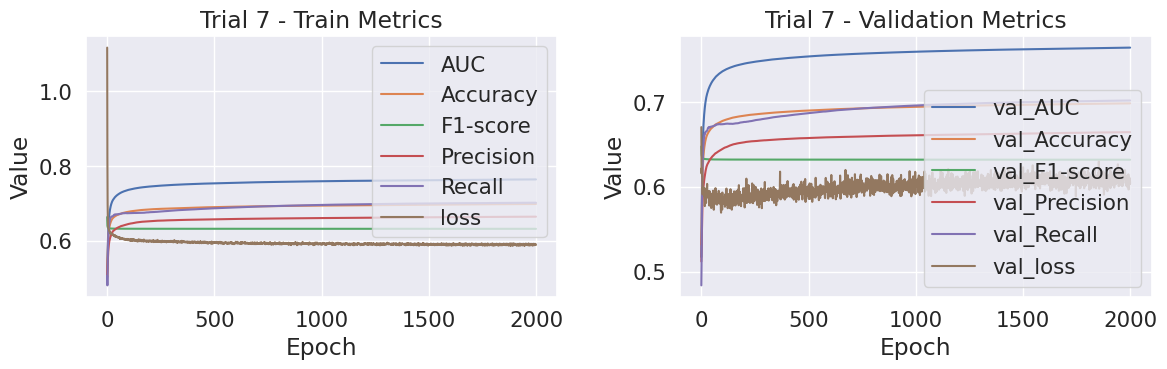

Training Progress: 100%|████████████████████████████████████████████████████████████| 2000/2000 [32:02<00:00,  1.04it/s]

  1/322 ━━━━━━━━━━━━━━━━━━━━ 52s 165ms/step

322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Training Progress: 100%|████████████████████████████████████████████████████████████| 2000/2000 [59:53<00:00,  1.80s/it]

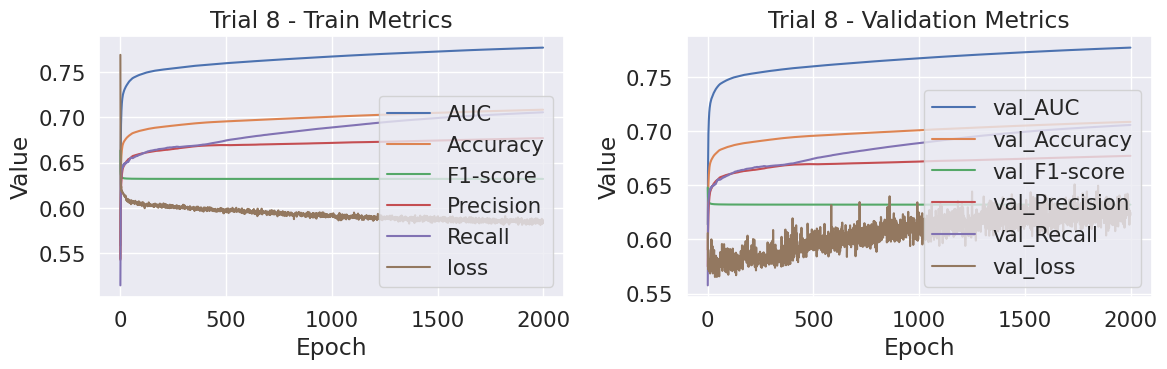

Training Progress: 100%|████████████████████████████████████████████████████████████| 2000/2000 [59:54<00:00,  1.80s/it]


322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Training Progress: 100%|████████████████████████████████████████████████████████████| 2000/2000 [32:26<00:00,  1.01s/it]

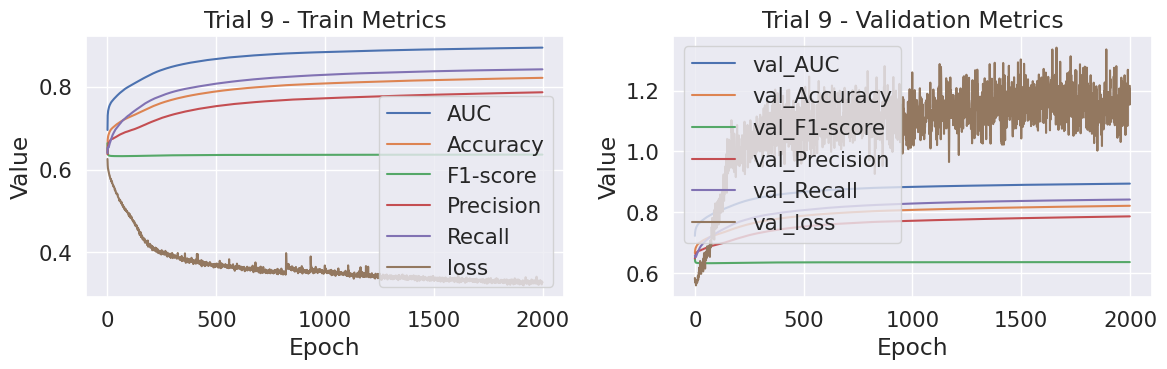

Training Progress: 100%|████████████████████████████████████████████████████████████| 2000/2000 [32:26<00:00,  1.03it/s]


322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Trial:  0 State:  1 Best Epoch:  1999
Metrics:  {'AUC': 0.8572891354560852, 'Accuracy': 0.7805526852607727, 'Precision': 0.7441295981407166, 'Recall': 0.8002901673316956, 'loss': 0.42339226603507996, 'val_AUC': 0.8572924733161926, 'val_Accuracy': 0.7805557250976562, 'val_Precision': 0.7441316843032837, 'val_Recall': 0.8002976775169373, 'val_loss': 0.9702870845794678, 'F1-score': 0.771188784197335, 'val_F1-score': 0.771193391470897}
Model Save: /mnt/c/DataScience/[DIVE]/Project/EducationCompetition/Model/DL_20251202_022848.keras

Trial:  1 State:  1 Best Epoch:  1999
Metrics:  {'AUC': 0.8430095911026001, 'Accuracy': 0.7630578279495239, 'Precision': 0.7269753217697144, 'Recall': 0.7803402543067932, 'loss': 0.4732816517353058, 'val_AUC': 0.8430110812187195, 'val_Accuracy': 0.7630609273910522, 'val_Precision': 0.7269788384437561, 'val_Recall': 0.7803372144699097, 'val_loss': 0.8355327844619751, 'F1-score': 0.7527131232083116, 'val_F1-score': 0.75271

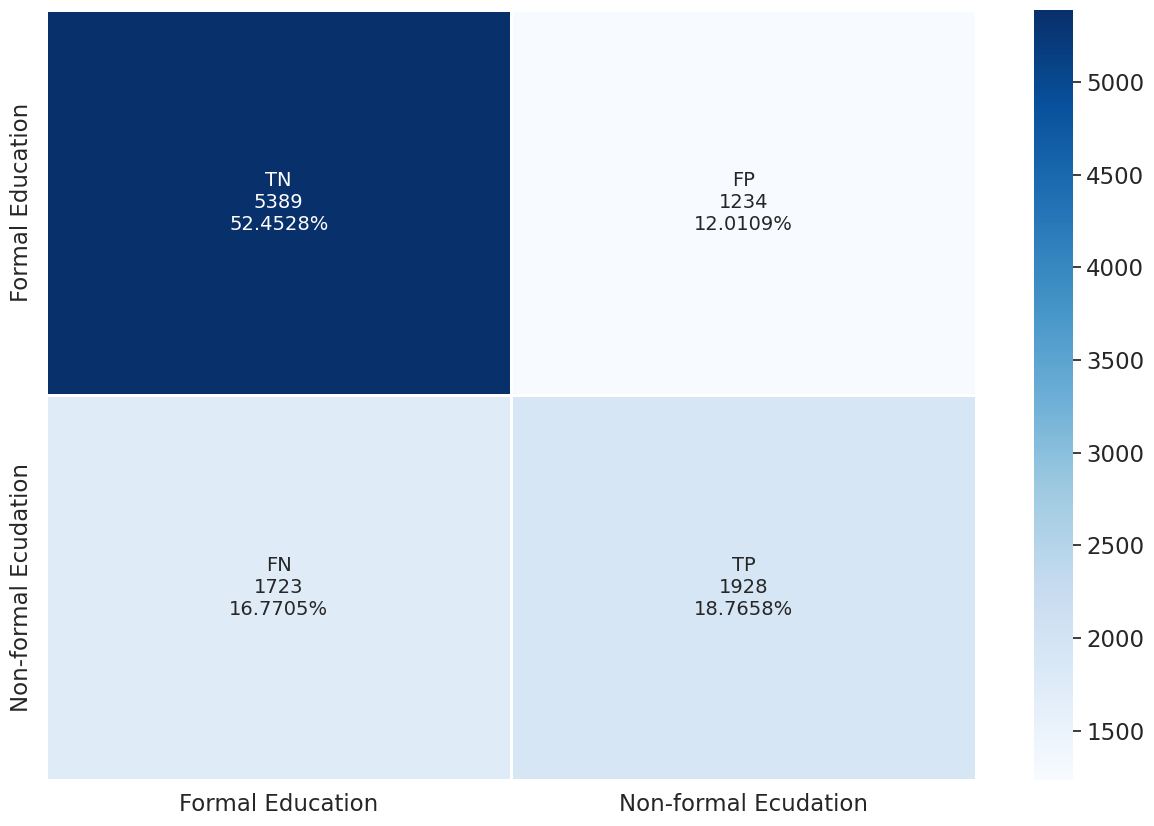

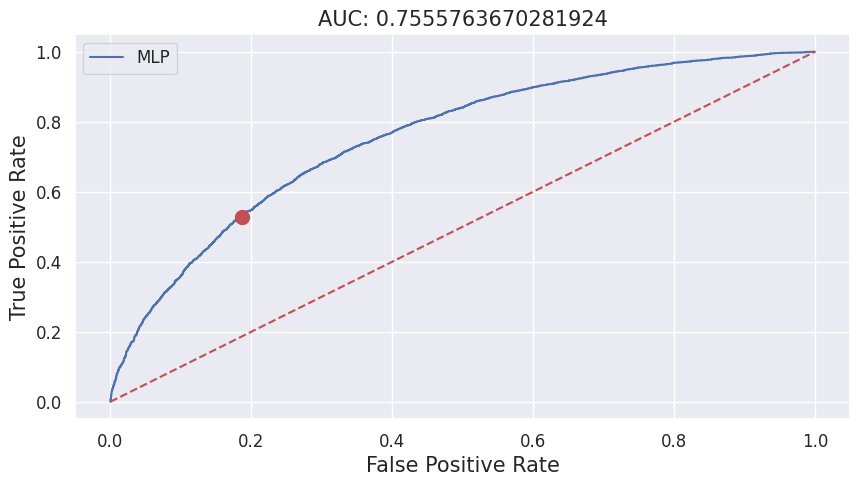

ValueError: too many values to unpack (expected 2)

In [49]:
# Reshape
if WEIGHT_METHOD != None:
    Y_train_dl, Y_test_dl = reshape_YtoOneHot(Y_train, Y_test)
else:
    Y_train_dl, Y_test_dl = Y_train.copy(), Y_test.copy()
X_train_dl, X_test_dl = X_train.copy(), X_test.copy()
if VALIDATION_SPLIT == None:
    VALIDATION_DATA = (X_test_dl, Y_test_dl)

# MLP with Hyperparameter Tuning
ALGO_NAME='MLP'
bestmodel_mlp, bestscore_mlp, bestsave_mlp = modeling_DLHyperOptimization(
    X_train_dl, Y_train_dl,
    model_keras=lambda trial, X, Y: modeling_MLP(
        X, Y,
        node_MLP=NODE_MLP,
        trial=trial
    ),
    validation_split=VALIDATION_SPLIT,
    validation_data=VALIDATION_DATA,
    epochs=EPOCHS,
    tune_trials=TUNE_TRIALS,
    tune_metric=TUNE_METRIC_DL,
    random_state=RANDOM_STATE
)
## Model Loaded
bestmodel_mlp = load_model(bestsave_mlp, compile=False) 

# Performance Evaluation
Scores_mlp = prediction_class(bestmodel_mlp, X_train_dl, Y_train_dl, X_test_dl, Y_test_dl,
                             LABEL_LIST=LABEL_LIST, ALGO_NAME=ALGO_NAME, keras=True)
display(Scores_mlp)

### CNN

X_train_reshape: (28932, 77) --> (28932, 77, 1)
X_test_reshape: (10274, 77) --> (10274, 77, 1)


  0%|          | 0/10 [00:00<?, ?it/s]

Training Progress:  10%|██████▏                                                      | 201/2000 [03:21<24:19,  1.23it/s]

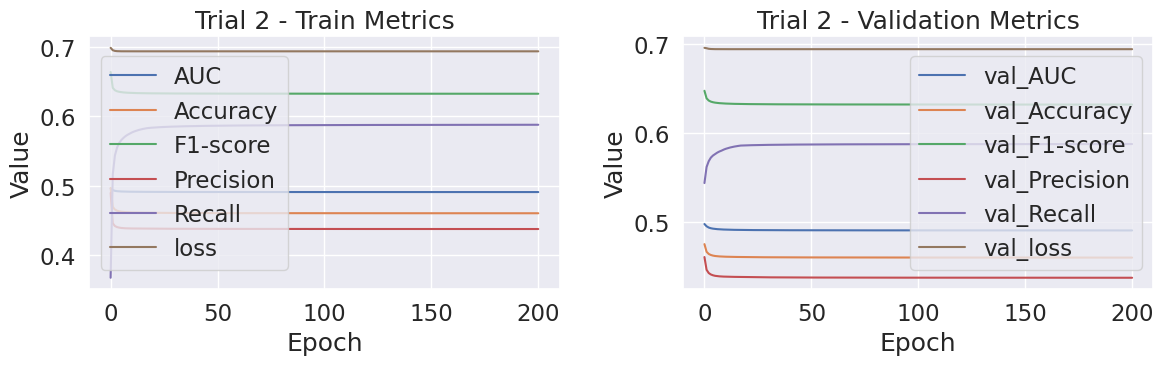

Training Progress:  10%|██████▏                                                      | 201/2000 [03:21<30:06,  1.00s/it]


322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


Training Progress:  40%|███████████████████████▌                                   | 799/2000 [44:48<1:03:48,  3.19s/it]

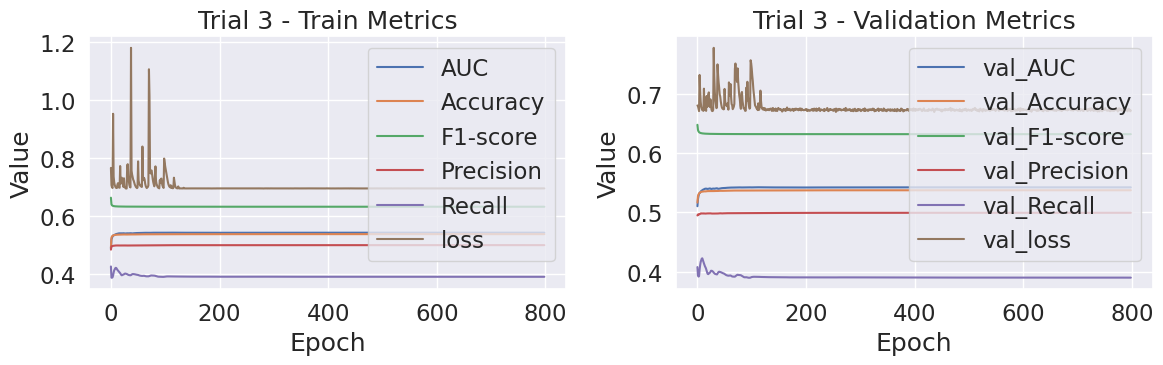

Training Progress:  40%|███████████████████████▌                                   | 799/2000 [44:48<1:07:21,  3.37s/it]


322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Training Progress: 100%|██████████████████████████████████████████████████████████| 2000/2000 [1:55:56<00:00,  3.52s/it]

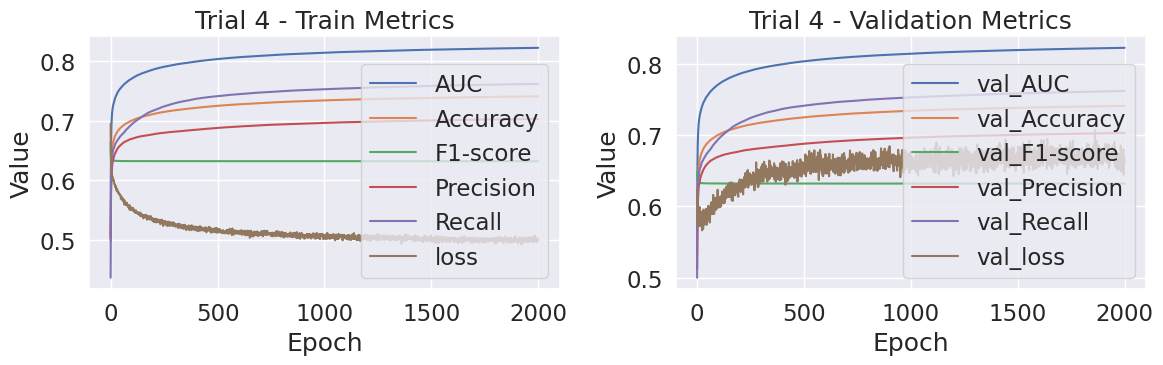

Training Progress: 100%|██████████████████████████████████████████████████████████| 2000/2000 [1:55:57<00:00,  3.48s/it]


322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Training Progress: 100%|████████████████████████████████████████████████████████████| 2000/2000 [31:42<00:00,  1.04it/s]

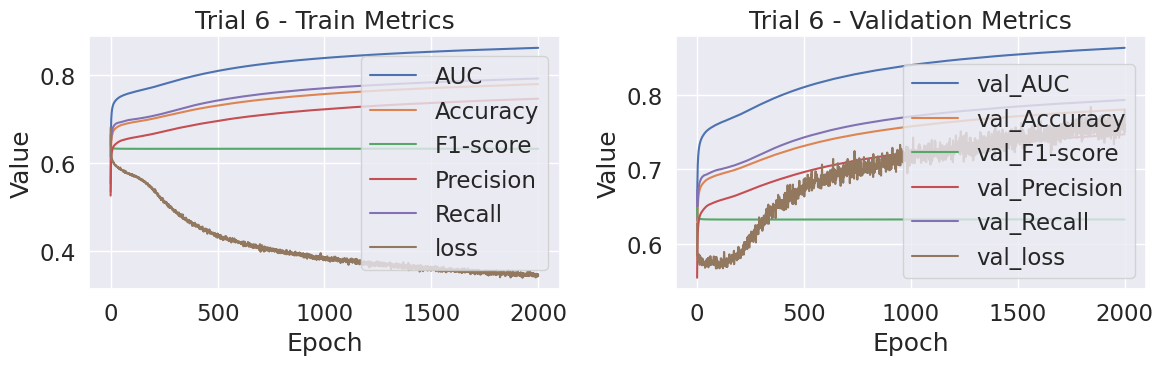

Training Progress: 100%|████████████████████████████████████████████████████████████| 2000/2000 [31:43<00:00,  1.05it/s]


322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Training Progress:  10%|█████▉                                                     | 201/2000 [11:30<1:45:30,  3.52s/it]

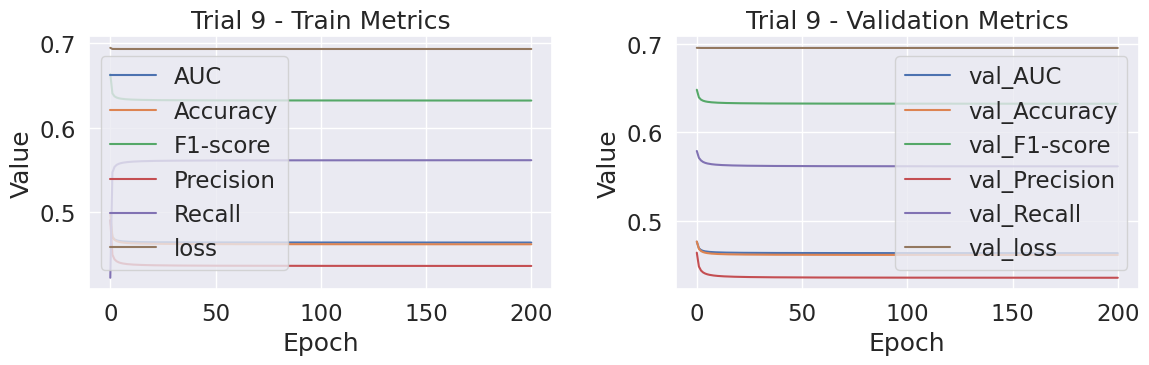

Training Progress:  10%|█████▉                                                     | 201/2000 [11:30<1:42:59,  3.43s/it]


322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Trial:  0 State:  2 Best Epoch:  None
Metrics:  None
Model Save: None

Trial:  1 State:  2 Best Epoch:  None
Metrics:  None
Model Save: None

Trial:  2 State:  1 Best Epoch:  0
Metrics:  {'AUC': 0.4955084025859833, 'Accuracy': 0.496653288602829, 'Precision': 0.4893774390220642, 'Recall': 0.36721163988113403, 'loss': 0.6982727646827698, 'val_AUC': 0.49781695008277893, 'val_Accuracy': 0.475210577249527, 'val_Precision': 0.4606829583644867, 'val_Recall': 0.5438836812973022, 'val_loss': 0.6959901452064514, 'F1-score': 0.41958296301003867, 'val_F1-score': 0.4988378737931514}
Model Save: /mnt/c/DataScience/[DIVE]/Project/EducationCompetition/Model/DL_20251202_134553.keras

Trial:  3 State:  1 Best Epoch:  598
Metrics:  {'AUC': 0.5423693060874939, 'Accuracy': 0.5374916791915894, 'Precision': 0.4994598925113678, 'Recall': 0.3900950849056244, 'loss': 0.6954149603843689, 'val_AUC': 0.5423755645751953, 'val_Accuracy': 0.5374932885169983, 'val_Precision': 0

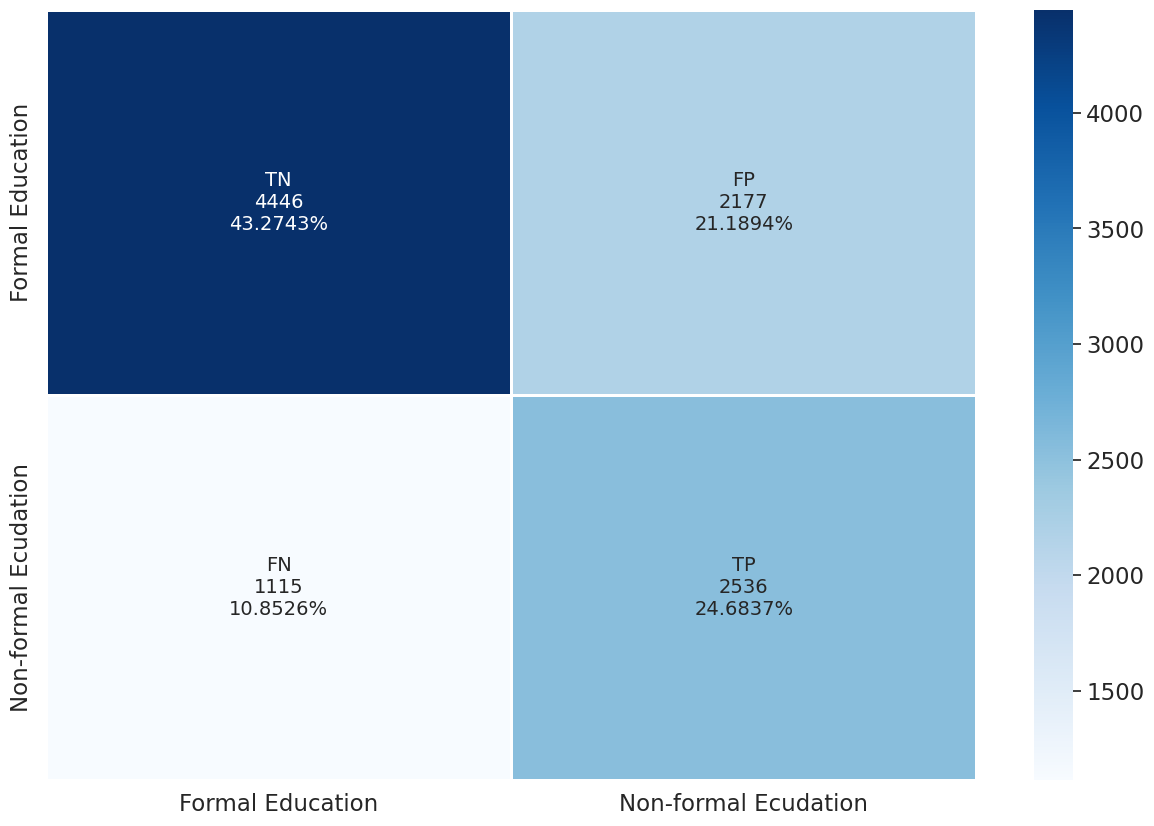

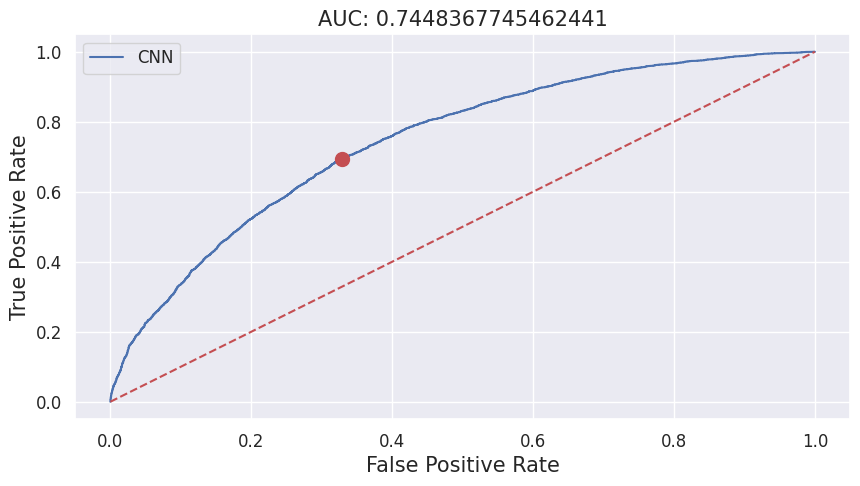

Algorithm            Dataset      N True Positive True Negative  \
0       CNN          Train set  28932         14276         14141   
1       CNN           Test set  10274          2536          4446   
2       CNN  Entire population  39206         16812         18587   

  False Positive False Negative Precision Recall Specificity F1-score  \
0            325            190    0.9777 0.9869      0.9775   0.9823   
1           2177           1115    0.5381 0.6946      0.6713   0.6064   
2           2502           1305    0.8705 0.9280      0.8814   0.8983   

  Accuracy Balanced Accuracy    AUC  
0   0.9822            0.9822 0.9986  
1   0.6796            0.6830 0.7448  
2   0.9029            0.9047 0.9523

In [54]:
# Reshape
if WEIGHT_METHOD != None:
    Y_train_dl, Y_test_dl = reshape_YtoOneHot(Y_train, Y_test)
else:
    Y_train_dl, Y_test_dl = Y_train.copy(), Y_test.copy()
X_train_dl, X_test_dl = reshape_X2Dto3D(X_train, X_test)
if VALIDATION_SPLIT == None:
    VALIDATION_DATA = (X_test_dl, Y_test_dl)

# CNN with Hyperparameter Tuning
ALGO_NAME='CNN'
bestmodel_cnn, bestscore_cnn, bestsave_cnn = modeling_DLHyperOptimization(
    X_train_dl, Y_train_dl,
    model_keras=lambda trial, X, Y: modeling_CNN1D(
        X, Y,
        node_CNN1=NODE_CNN1, node_CNN2=NODE_CNN2,
        trial=trial
    ),
    validation_split=VALIDATION_SPLIT,
    validation_data=VALIDATION_DATA,
    epochs=EPOCHS,
    tune_trials=TUNE_TRIALS,
    tune_metric=TUNE_METRIC_DL,
    random_state=RANDOM_STATE
)
## Model Loaded
bestmodel_cnn = load_model(bestsave_cnn, compile=False) 

# Performance Evaluation
Scores_cnn = prediction_class(bestmodel_cnn, X_train_dl, Y_train_dl, X_test_dl, Y_test_dl,
                              LABEL_LIST=LABEL_LIST, ALGO_NAME=ALGO_NAME)
display(Scores_cnn)

# Summary

In [55]:
folder_location = os.path.join(os.getcwd(),'Result')
prediction_summary(folder_location=folder_location, 
                   # algonames=['Logistic Regression', 'Random Forest', 'XGBoost', 'LigntGBM', 'CatBoost'])
                   algonames=['Logistic Regression', 'Random Forest', 'XGBoost', 'LigntGBM', 'CatBoost', 'MLP', 'CNN'])


Dataset            Algorithm      N  True Positive  True Negative  \
0  Train set  Logistic Regression  28932           9901           9951   
1  Train set        Random Forest  28932          14190          14236   
2  Train set              XGBoost  28932          14463          10305   
3  Train set             CatBoost  28932          10579          10117   
4  Train set                  MLP  28932           9218          12902   
5  Train set                  CNN  28932          14276          14141   
0   Test set  Logistic Regression  10274           2510           4480   
1   Test set        Random Forest  10274           2684           4601   
2   Test set              XGBoost  10274           3318           2860   
3   Test set             CatBoost  10274           2640           4520   
4   Test set                  MLP  10274           1928           5389   
5   Test set                  CNN  10274           2536           4446   

   False Positive  False Negative  Precision  Recall  Specificity  F1-score  \
0            4515            4565     0.6868  0.6844       0.6879    0.6856   
1             230             276     0.9840  0.9809       0.9841    0.9825   
2            4161               3     0.7766  0.9998       0.7124    0.8742   
3            4349            3887     0.7087  0.7313       0.6994    0.7198   
4            1564            5248     0.8549  0.6372       0.8919    0.7302   
5             325             190     0.9777  0.9869       0.9775    0.9823   
0            2143            1141     0.5394  0.6875       0.6764    0.6045   
1            2022             967     0.5703  0.7351       0.6947    0.6423   
2            3763             333     0.4686  0.9088       0.4318    0.6183   
3            2103            1011     0.5566  0.7231       0.6825    0.6290   
4            1234            1723     0.6097  0.5281       0.8137    0.5660   
5            2177            1115     0.5381  0.6946       0.6713    0.6064   

   Accuracy  Balanced Accuracy    AUC  
0    0.6862             0.6862 0.7541  
1    0.9825             0.9825 0.9987  
2    0.8561             0.8561 0.9937  
3    0.7153             0.7153 0.7917  
4    0.7646             0.7646 0.8765  
5    0.9822             0.9822 0.9986  
0    0.6804             0.6820 0.7551  
1    0.7091             0.7149 0.7882  
2    0.6013             0.6703 0.7962  
3    0.6969             0.7028 0.7757  
4    0.7122             0.6709 0.7556  
5    0.6796             0.6830 0.7448

# Explanation

In [6]:
if platform.system() == 'Darwin': #맥
    plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
    # FONT_NAME = 'Malgun Gothic'
    FONT_NAME = 'malgun'
    plt.rc('font', family=FONT_NAME) 
    plt.rcParams['font.family'] = FONT_NAME
    mpl.rc('font', family=FONT_NAME)
    sns.set(font=FONT_NAME) 
    sys_font = font_manager.findSystemFonts()
    FONT_PATHS = [path for path in sys_font if 'malgun' in path]
    if len(FONT_PATHS) != 0:
        rc('font', family=font_manager.FontProperties(fname=FONT_PATHS[0]).get_name())
elif platform.system() == 'Linux':
    FONT_NAME = 'NanumGothic'
    plt.rc('font', family=FONT_NAME) 
    plt.rcParams['font.family'] = FONT_NAME
    mpl.rc('font', family=FONT_NAME)
    sns.set(font=FONT_NAME) 
    sys_font = font_manager.findSystemFonts()
    FONT_PATHS = [path for path in sys_font if 'NanumGothic.ttf' in path]
    if len(FONT_PATHS) != 0:
        rc('font', family=font_manager.FontProperties(fname=FONT_PATHS[0]).get_name())

 99%|===================| 10167/10274 [00:30<00:00]        

Feature Interactive Contribution...


100%|██████████████████████████████████████████████████████████████████████████████████| 77/77 [00:00<00:00, 141.72it/s]


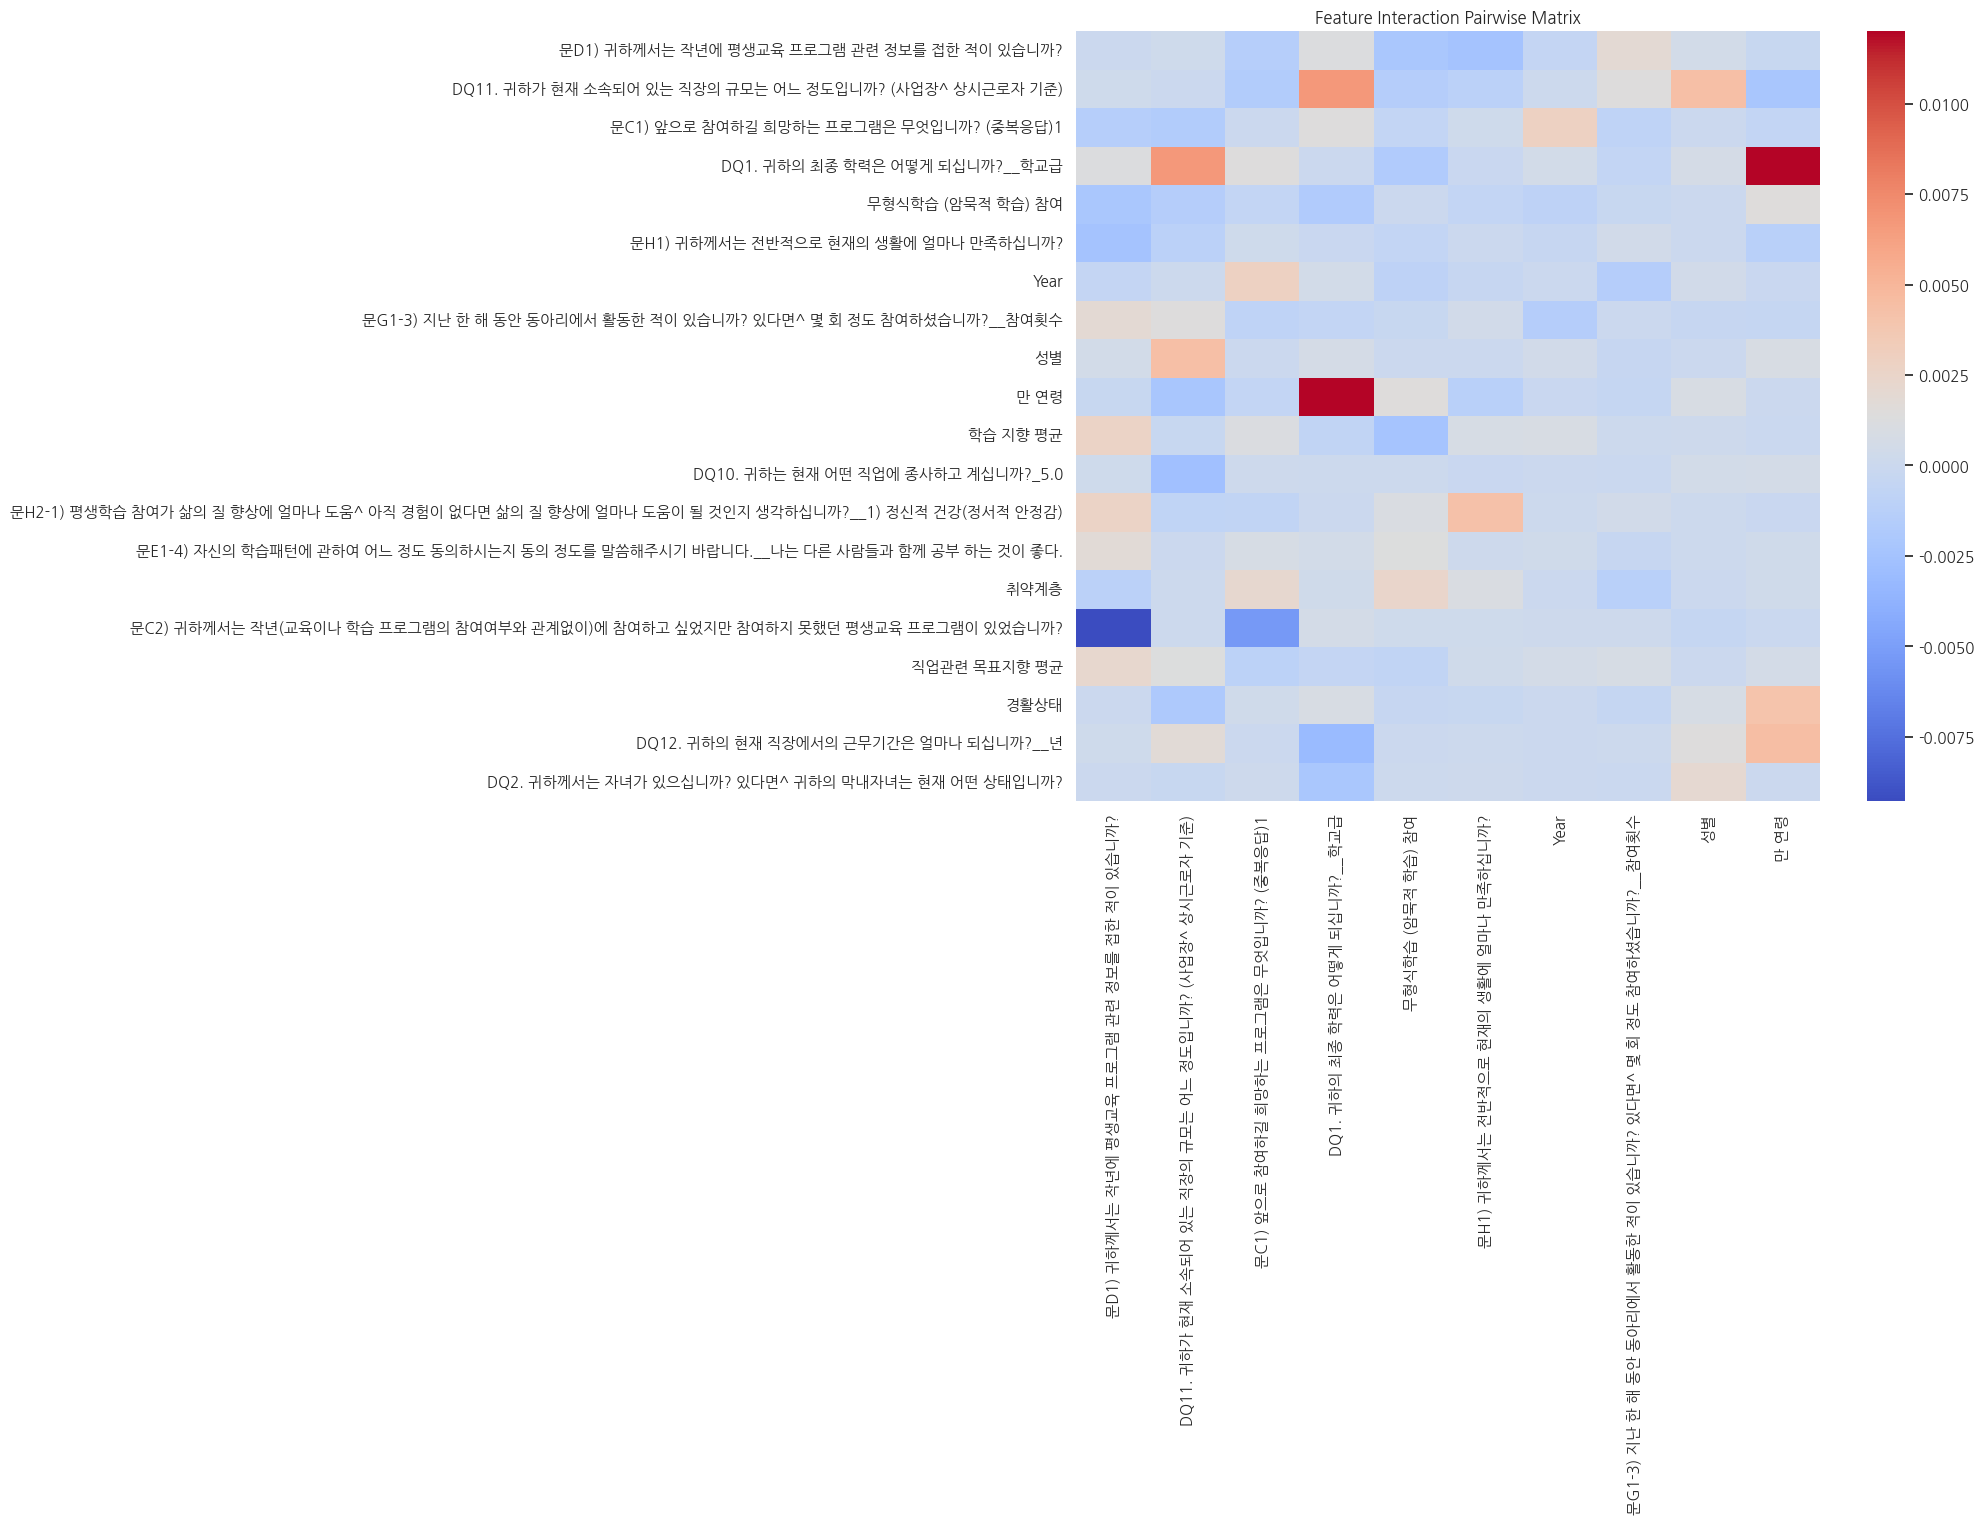

100%|███████████████████████████████████████████████████████████████████████████████████| 77/77 [00:00<00:00, 88.03it/s]


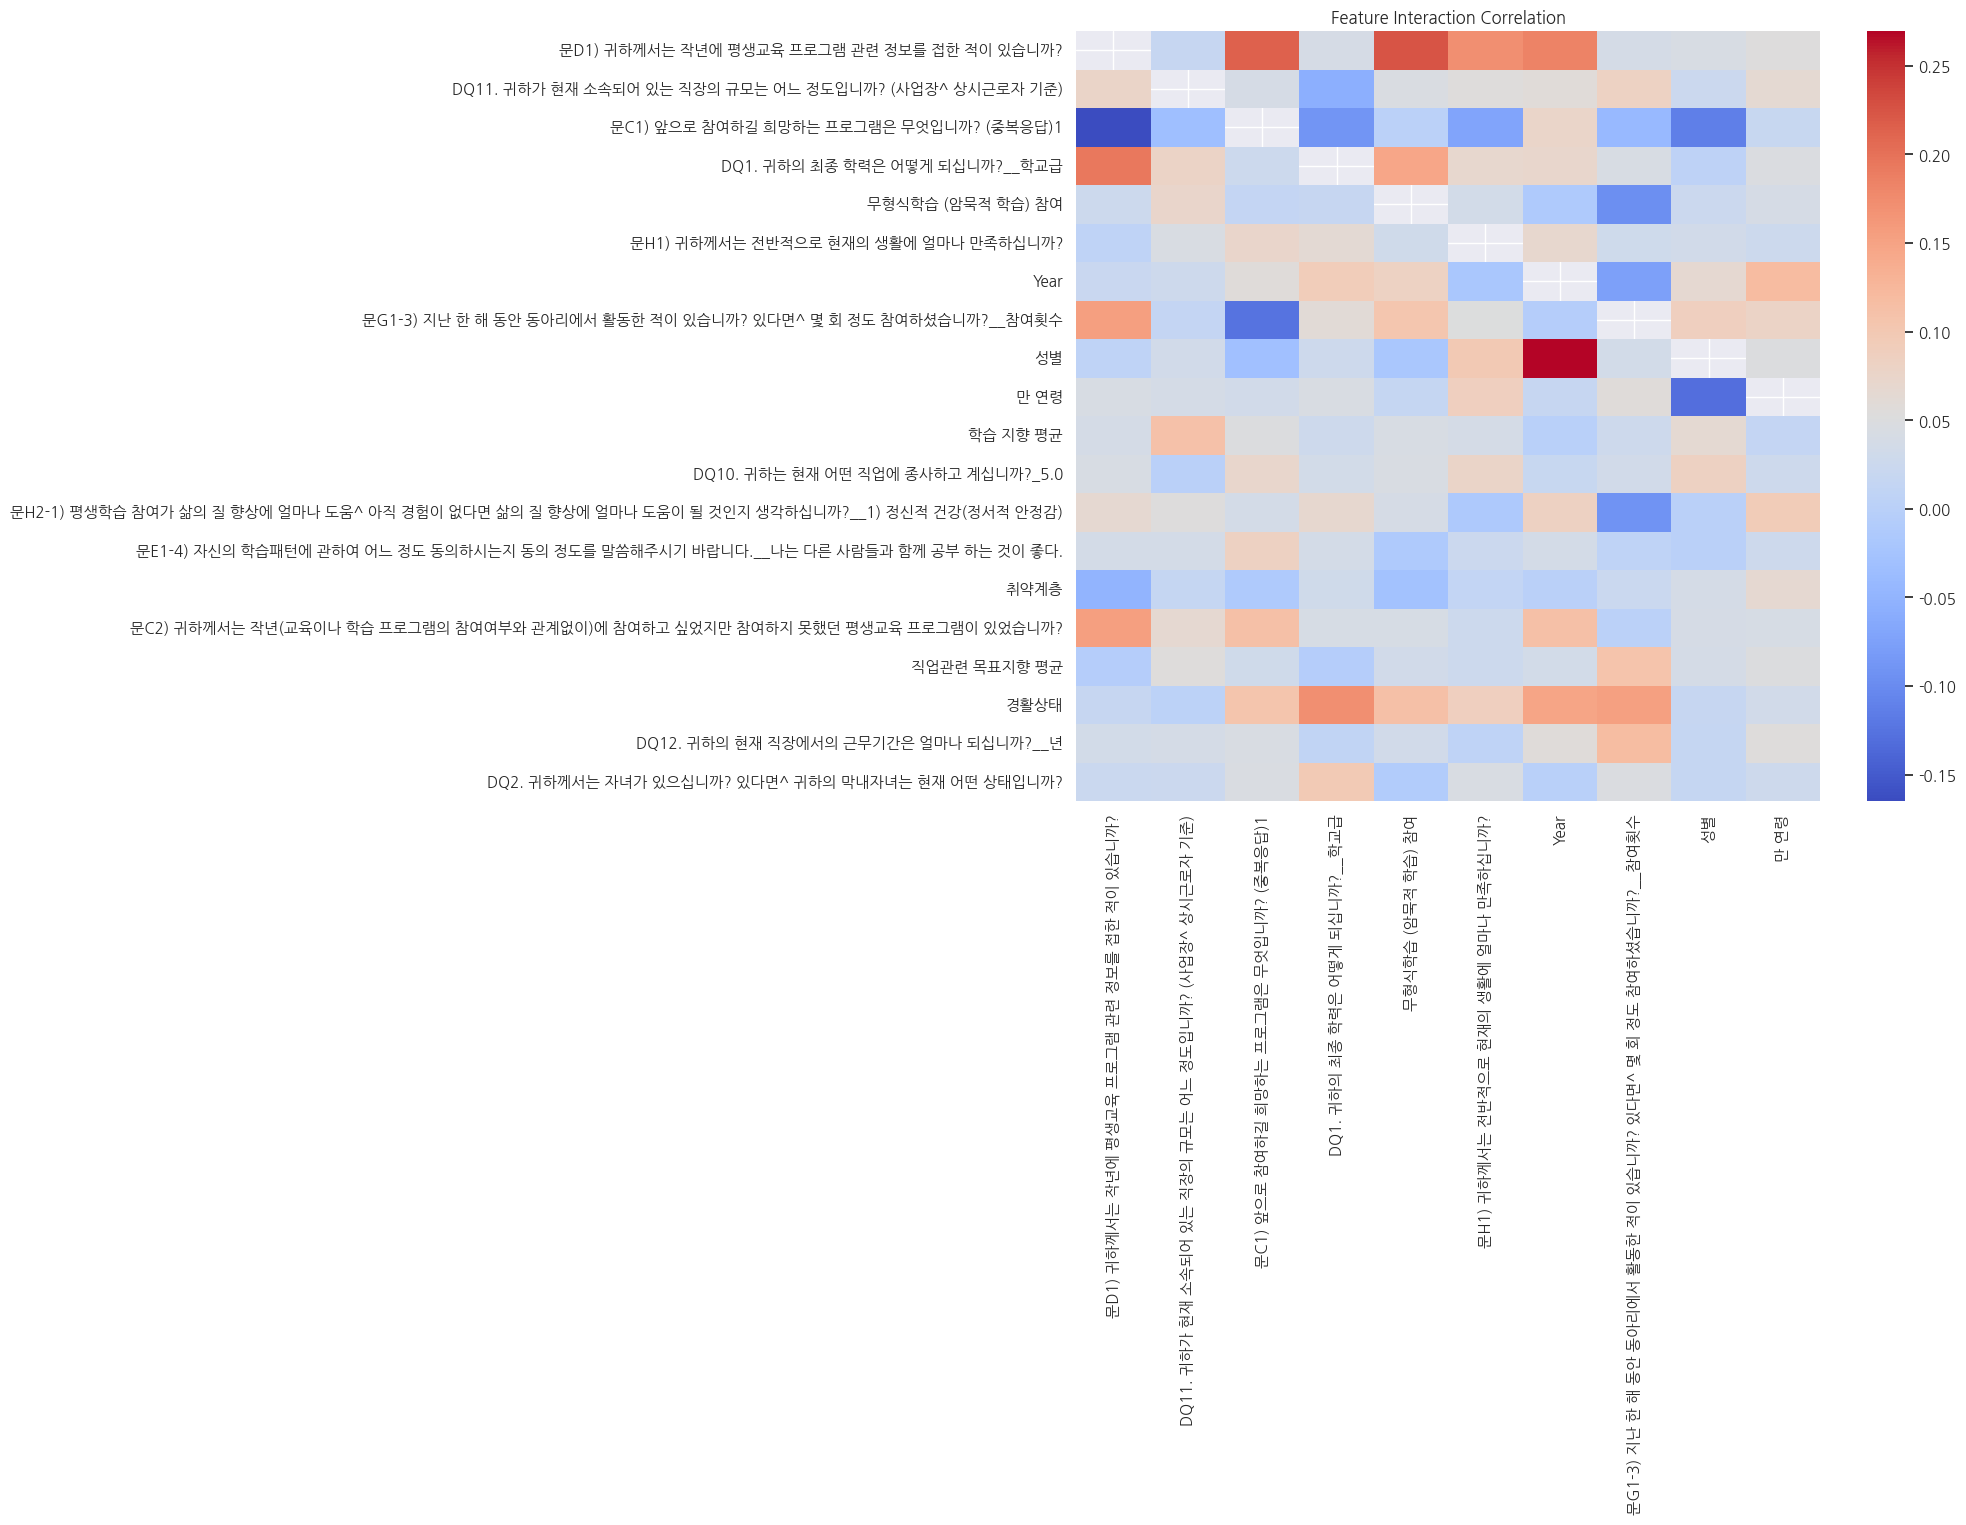

Feature Total Contribution...
Feature Contribution Direction...


100%|██████████████████████████████████████████████████████████████████████████████████| 77/77 [00:00<00:00, 100.83it/s]


Feature  Importance  \
0             문D1) 귀하께서는 작년에 평생교육 프로그램 관련 정보를 접한 적이 있습니까?      0.4724   
1  DQ11. 귀하가 현재 소속되어 있는 직장의 규모는 어느 정도입니까? (사업장^ 상시근로자 기준)      0.2712   
2                 문C1) 앞으로 참여하길 희망하는 프로그램은 무엇입니까? (중복응답)1      0.2273   
3                          DQ1. 귀하의 최종 학력은 어떻게 되십니까?__학교급      0.2222   
4                                       무형식학습 (암묵적 학습) 참여      0.2179   

   Contribution Range  Contribution (Correlation)  \
0              1.0146                      0.9725   
1              0.6291                      0.7779   
2              0.4541                      0.5687   
3              0.4455                      0.8783   
4              0.4385                      0.9269   

   Contribution (Linear Regression)  Contbituion (Quantile Regression)  \
0                            1.0146                             1.0146   
1                           16.5555                             1.9549   
2                            0.4763                            -0.5212   
3                            1.2359                             0.3202   
4                            0.4378                             0.4378   

                                                                         Feature  \
0                                                                           Year   
1                                             DQ10. 귀하는 현재 어떤 직업에 종사하고 계십니까?_5.0   
2                                                                           취약계층   
3  문C2) 귀하께서는 작년(교육이나 학습 프로그램의 참여여부와 관계없이)에 참여하고 싶었지만 참여하지 못했던 평생교육 프로그램이 있었습니까?   
4                              DQ2. 귀하께서는 자녀가 있으십니까? 있다면^ 귀하의 막내자녀는 현재 어떤 상태입니까?   

   Importance  Contribution Range  Contribution (Correlation)  \
0      0.1558              0.3255                     -0.8370   
1      0.1142              0.4253                     -0.9269   
2      0.0917              0.1852                     -0.8174   
3      0.0886              0.2206                     -0.8206   
4      0.0664              0.1336                     -0.4432   

   Contribution (Linear Regression)  Contbituion (Quantile Regression)  
0                           -0.4171                             0.0000  
1                           -0.4299                            -0.4299  
2                           -0.3272                            -0.1710  
3                           -0.2272                            -0.2272  
4                           -0.0884                            -0.2246

Feature  Importance  \
0          DQ11. 귀하가 현재 소속되어 있는 직장의 규모는 어느 정도입니까? (사업장^ 상시근로자 기준)      0.2712   
1  문G1-3) 지난 한 해 동안 동아리에서 활동한 적이 있습니까? 있다면^ 몇 회 정도 참여하셨습니까?__참여횟수      0.1542   
2                            문H1) 귀하께서는 전반적으로 현재의 생활에 얼마나 만족하십니까?      0.1583   
3                                  DQ1. 귀하의 최종 학력은 어떻게 되십니까?__학교급      0.2222   
4                     문D1) 귀하께서는 작년에 평생교육 프로그램 관련 정보를 접한 적이 있습니까?      0.4724   

   Contribution Range  Contribution (Correlation)  \
0              0.6291                      0.7779   
1              0.3138                      0.7237   
2              0.3297                      0.8314   
3              0.4455                      0.8783   
4              1.0146                      0.9725   

   Contribution (Linear Regression)  Contbituion (Quantile Regression)  \
0                           16.5555                             1.9549   
1                            3.2511                             3.7973   
2                            1.3388                             0.0507   
3                            1.2359                             0.3202   
4                            1.0146                             1.0146   

                                  Feature  Importance  Contribution Range  \
0     DQ10. 귀하는 현재 어떤 직업에 종사하고 계십니까?_10.0      0.0011                 NaN   
1  DQ12. 귀하의 현재 직장에서의 근무기간은 얼마나 되십니까?__개월      0.0640              0.1327   
2      DQ10. 귀하는 현재 어떤 직업에 종사하고 계십니까?_5.0      0.1142              0.4253   
3                                    Year      0.1558              0.3255   
4                                    취약계층      0.0917              0.1852   

   Contribution (Correlation)  Contribution (Linear Regression)  \
0                     -0.9498                           -1.3565   
1                     -0.3300                           -1.1852   
2                     -0.9269                           -0.4299   
3                     -0.8370                           -0.4171   
4                     -0.8174                           -0.3272   

   Contbituion (Quantile Regression)  
0                            -1.3565  
1                            -2.5429  
2                            -0.4299  
3                             0.0000  
4                            -0.1710

In [7]:
# Test
model = XGBClassifier(n_estimators=100, 
                          scale_pos_weight=Y_train.value_counts()[0]/Y_train.value_counts()[1],   # binary
                          tree_method='gpu_hist',
                          predictor='gpu_predictor',
                          random_state=123)
model.fit(X_train, Y_train)

shap_values_train, shap_values_test,\
shap_intervalues_train, shap_intervalues_test = explanation_SHAP_values(model, X_train, X_test, 
                                                                        X_colname, model_type='Tree')
explanation_SHAP_interaction(shap_values_train, shap_intervalues_train, X_colname, max_display=20)
explanation_SHAP_contribution(shap_values_train, X_train, n_bins=5, X_colname=X_colname,
                                  save_name_final='Train.csv')

In [ ]:
# model_rf, Score_te_rf, Score_trte_rf = modeling_RandomForestClassifier(X_train, Y_train, 
#                                                              X_test, Y_test, 
#                                                              X_colname=X_colname, 
#                                                              shap=SHAP, 
#                                                              X_top_display=X_TOP_DISPLAY, 
#                                                              dependency=not DEPENDENCY,
#                                                              label_list=LABEL_LIST)
# display(model_rf, Score_te_rf, Score_trte_rf)

In [184]:
# model_xgb, Score_te_xgb, Score_trte_xgb = modeling_XGBClassifier(X_train, Y_train, 
#                                                       X_test, Y_test, 
#                                                       X_colname=X_colname, 
#                                                       shap=SHAP, 
#                                                       X_top_display=X_TOP_DISPLAY, 
#                                                       dependency=not DEPENDENCY,
#                                                       label_list=LABEL_LIST)
# display(model_xgb, Score_te_xgb, Score_trte_xgb)

In [15]:
# model_lgbm, Score_te_lgbm, Score_trte_lgbm = modeling_LGBMClassifier(X_train, Y_train, 
#                                                          X_test, Y_test, 
#                                                          X_colname=X_colname, 
#                                                          shap=SHAP, 
#                                                          X_top_display=X_TOP_DISPLAY, 
#                                                          dependency=not DEPENDENCY,
#                                                          label_list=LABEL_LIST)
# display(model_lgbm, Score_te_lgbm, Score_trte_lgbm)